In [ ]:
#!/usr/bin/env python
# coding: utf-8

# Physics Informed Neural Network (PINN) in Tensorflow

import time
import sys
sys.path.insert(0, './utilities')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product, combinations
import matplotlib.gridspec as gridspec

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import QuantileTransformer
#from sklearn.preprocessing import PowerTransformer

# Tensorflow random seed for initialization
np.random.seed(1234)
tf.compat.v1.set_random_seed(1234)

# Define the Class PINN which we are going to use
class PINN:

    # Initialize the class
    def __init__(self,
                 x, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12, n13, n14, n15, n16, n17, n18,
                 n19, n20, n21, n22, n23, n24, n25, n26, n27, n28, n29, n30, n31, n32, n33, n34,
                 n35, n36, n37, n38, n39, n40, n41, n42, n43, n44, n45, n46, n47, nat,
                 rho, u, p, E,
                 R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18,
                 R19, R20, R21, R22, R23, R24, R25, R26, R27, R28, R29, R30, R31, R32, R33, R34,
                 R35, R36, R37, R38, R39, R40, R41, R42, R43, R44, R45, R46, R47, Rat, layers):

        # Create Input Matrix for the given training data point
        X = np.concatenate([x], 1)

        # min & max for normalization
        self.lb = X.min(0)
        self.ub = X.max(0)

        self.X  = X

        # class attribute definitions
        self.x   = x

        self.n1  = n1
        self.n2  = n2
        self.n3  = n3
        self.n4  = n4
        self.n5  = n5
        self.n6  = n6
        self.n7  = n7
        self.n8  = n8
        self.n9  = n9
        self.n10 = n10
        self.n11 = n11
        self.n12 = n12
        self.n13 = n13
        self.n14 = n14
        self.n15 = n15
        self.n16 = n16
        self.n17 = n17
        self.n18 = n18
        self.n19 = n19
        self.n20 = n20
        self.n21 = n21
        self.n22 = n22
        self.n23 = n23
        self.n24 = n24
        self.n25 = n25
        self.n26 = n26
        self.n27 = n27
        self.n28 = n28
        self.n29 = n29
        self.n30 = n30
        self.n31 = n31
        self.n32 = n32
        self.n33 = n33
        self.n34 = n34
        self.n35 = n35
        self.n36 = n36
        self.n37 = n37
        self.n38 = n38
        self.n39 = n39
        self.n40 = n40
        self.n41 = n41
        self.n42 = n42
        self.n43 = n43
        self.n44 = n44
        self.n45 = n45
        self.n46 = n46
        self.n47 = n47
        self.nat = nat

        self.rho = rho
        self.u   = u
        self.p   = p
        self.E   = E

        self.R1  = R1
        self.R2  = R2
        self.R3  = R3
        self.R4  = R4
        self.R5  = R5
        self.R6  = R6
        self.R7  = R7
        self.R8  = R8
        self.R9  = R9
        self.R10 = R10
        self.R11 = R11
        self.R12 = R12
        self.R13 = R13
        self.R14 = R14
        self.R15 = R15
        self.R16 = R16
        self.R17 = R17
        self.R18 = R18
        self.R19 = R19
        self.R20 = R20
        self.R21 = R21
        self.R22 = R22
        self.R23 = R23
        self.R24 = R24
        self.R25 = R25
        self.R26 = R26
        self.R27 = R27
        self.R28 = R28
        self.R29 = R29
        self.R30 = R30
        self.R31 = R31
        self.R32 = R32
        self.R33 = R33
        self.R34 = R34
        self.R35 = R35
        self.R36 = R36
        self.R37 = R37
        self.R38 = R38
        self.R39 = R39
        self.R40 = R40
        self.R41 = R41
        self.R42 = R42
        self.R43 = R43
        self.R44 = R44
        self.R45 = R45
        self.R46 = R46
        self.R47 = R47
        self.Rat = Rat

        self.layers = layers

        # Initialize_NN is another class method which is used to assign random
        # weights and bias terms to the network. This not only initializes the
        # network but also structures the sizes and values of all the weights and
        # biases that would be so required for the network defined by layers.
        self.weights, self.biases = self.initialize_NN(layers)

        # Define a session to run
        # tf placeholders and graph
        self.sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(allow_soft_placement=True,
                                                                         log_device_placement=True))

        # Define tensors for each variable using tf.placeholder, with shape
        # similar to their numpy counterparts variable_Name
        self.x_tf   = tf.compat.v1.placeholder(tf.float32, shape=[None, self.x.shape[1]])

        self.rho_tf = tf.compat.v1.placeholder(tf.float32, shape=[None, self.rho.shape[1]])
        self.u_tf   = tf.compat.v1.placeholder(tf.float32, shape=[None, self.u.shape[1]])
        self.p_tf   = tf.compat.v1.placeholder(tf.float32, shape=[None, self.p.shape[1]])
        self.E_tf   = tf.compat.v1.placeholder(tf.float32, shape=[None, self.E.shape[1]])

        self.n1_tf  = tf.placeholder(tf.float32, shape=[None, self.n1.shape[1]])
        self.n2_tf  = tf.placeholder(tf.float32, shape=[None, self.n2.shape[1]])
        self.n3_tf  = tf.placeholder(tf.float32, shape=[None, self.n3.shape[1]])
        self.n4_tf  = tf.placeholder(tf.float32, shape=[None, self.n4.shape[1]])
        self.n5_tf  = tf.placeholder(tf.float32, shape=[None, self.n5.shape[1]])
        self.n6_tf  = tf.placeholder(tf.float32, shape=[None, self.n6.shape[1]])
        self.n7_tf  = tf.placeholder(tf.float32, shape=[None, self.n7.shape[1]])
        self.n8_tf  = tf.placeholder(tf.float32, shape=[None, self.n8.shape[1]])
        self.n9_tf  = tf.placeholder(tf.float32, shape=[None, self.n9.shape[1]])
        self.n10_tf = tf.placeholder(tf.float32, shape=[None, self.n10.shape[1]])
        self.n11_tf = tf.placeholder(tf.float32, shape=[None, self.n11.shape[1]])
        self.n12_tf = tf.placeholder(tf.float32, shape=[None, self.n12.shape[1]])
        self.n13_tf = tf.placeholder(tf.float32, shape=[None, self.n13.shape[1]])
        self.n14_tf = tf.placeholder(tf.float32, shape=[None, self.n14.shape[1]])
        self.n15_tf = tf.placeholder(tf.float32, shape=[None, self.n15.shape[1]])
        self.n16_tf = tf.placeholder(tf.float32, shape=[None, self.n16.shape[1]])
        self.n17_tf = tf.placeholder(tf.float32, shape=[None, self.n17.shape[1]])
        self.n18_tf = tf.placeholder(tf.float32, shape=[None, self.n18.shape[1]])
        self.n19_tf = tf.placeholder(tf.float32, shape=[None, self.n19.shape[1]])
        self.n20_tf = tf.placeholder(tf.float32, shape=[None, self.n20.shape[1]])
        self.n21_tf = tf.placeholder(tf.float32, shape=[None, self.n21.shape[1]])
        self.n22_tf = tf.placeholder(tf.float32, shape=[None, self.n22.shape[1]])
        self.n23_tf = tf.placeholder(tf.float32, shape=[None, self.n23.shape[1]])
        self.n24_tf = tf.placeholder(tf.float32, shape=[None, self.n24.shape[1]])
        self.n25_tf = tf.placeholder(tf.float32, shape=[None, self.n25.shape[1]])
        self.n26_tf = tf.placeholder(tf.float32, shape=[None, self.n26.shape[1]])
        self.n27_tf = tf.placeholder(tf.float32, shape=[None, self.n27.shape[1]])
        self.n28_tf = tf.placeholder(tf.float32, shape=[None, self.n28.shape[1]])
        self.n29_tf = tf.placeholder(tf.float32, shape=[None, self.n29.shape[1]])
        self.n30_tf = tf.placeholder(tf.float32, shape=[None, self.n30.shape[1]])
        self.n31_tf = tf.placeholder(tf.float32, shape=[None, self.n31.shape[1]])
        self.n32_tf = tf.placeholder(tf.float32, shape=[None, self.n32.shape[1]])
        self.n33_tf = tf.placeholder(tf.float32, shape=[None, self.n33.shape[1]])
        self.n34_tf = tf.placeholder(tf.float32, shape=[None, self.n34.shape[1]])
        self.n35_tf = tf.placeholder(tf.float32, shape=[None, self.n35.shape[1]])
        self.n36_tf = tf.placeholder(tf.float32, shape=[None, self.n36.shape[1]])
        self.n37_tf = tf.placeholder(tf.float32, shape=[None, self.n37.shape[1]])
        self.n38_tf = tf.placeholder(tf.float32, shape=[None, self.n38.shape[1]])
        self.n39_tf = tf.placeholder(tf.float32, shape=[None, self.n39.shape[1]])
        self.n40_tf = tf.placeholder(tf.float32, shape=[None, self.n40.shape[1]])
        self.n41_tf = tf.placeholder(tf.float32, shape=[None, self.n41.shape[1]])
        self.n42_tf = tf.placeholder(tf.float32, shape=[None, self.n42.shape[1]])
        self.n43_tf = tf.placeholder(tf.float32, shape=[None, self.n43.shape[1]])
        self.n44_tf = tf.placeholder(tf.float32, shape=[None, self.n44.shape[1]])
        self.n45_tf = tf.placeholder(tf.float32, shape=[None, self.n45.shape[1]])
        self.n46_tf = tf.placeholder(tf.float32, shape=[None, self.n46.shape[1]])
        self.n47_tf = tf.placeholder(tf.float32, shape=[None, self.n47.shape[1]])
        self.nat_tf = tf.placeholder(tf.float32, shape=[None, self.nat.shape[1]])

        self.R1_tf  = tf.placeholder(tf.float32, shape=[None, self.R1.shape[1]])
        self.R2_tf  = tf.placeholder(tf.float32, shape=[None, self.R2.shape[1]])
        self.R3_tf  = tf.placeholder(tf.float32, shape=[None, self.R3.shape[1]])
        self.R4_tf  = tf.placeholder(tf.float32, shape=[None, self.R4.shape[1]])
        self.R5_tf  = tf.placeholder(tf.float32, shape=[None, self.R5.shape[1]])
        self.R6_tf  = tf.placeholder(tf.float32, shape=[None, self.R6.shape[1]])
        self.R7_tf  = tf.placeholder(tf.float32, shape=[None, self.R7.shape[1]])
        self.R8_tf  = tf.placeholder(tf.float32, shape=[None, self.R8.shape[1]])
        self.R9_tf  = tf.placeholder(tf.float32, shape=[None, self.R9.shape[1]])
        self.R10_tf = tf.placeholder(tf.float32, shape=[None, self.R10.shape[1]])
        self.R11_tf = tf.placeholder(tf.float32, shape=[None, self.R11.shape[1]])
        self.R12_tf = tf.placeholder(tf.float32, shape=[None, self.R12.shape[1]])
        self.R13_tf = tf.placeholder(tf.float32, shape=[None, self.R13.shape[1]])
        self.R14_tf = tf.placeholder(tf.float32, shape=[None, self.R14.shape[1]])
        self.R15_tf = tf.placeholder(tf.float32, shape=[None, self.R15.shape[1]])
        self.R16_tf = tf.placeholder(tf.float32, shape=[None, self.R16.shape[1]])
        self.R17_tf = tf.placeholder(tf.float32, shape=[None, self.R17.shape[1]])
        self.R18_tf = tf.placeholder(tf.float32, shape=[None, self.R18.shape[1]])
        self.R19_tf = tf.placeholder(tf.float32, shape=[None, self.R19.shape[1]])
        self.R20_tf = tf.placeholder(tf.float32, shape=[None, self.R20.shape[1]])
        self.R21_tf = tf.placeholder(tf.float32, shape=[None, self.R21.shape[1]])
        self.R22_tf = tf.placeholder(tf.float32, shape=[None, self.R22.shape[1]])
        self.R23_tf = tf.placeholder(tf.float32, shape=[None, self.R23.shape[1]])
        self.R24_tf = tf.placeholder(tf.float32, shape=[None, self.R24.shape[1]])
        self.R25_tf = tf.placeholder(tf.float32, shape=[None, self.R25.shape[1]])
        self.R26_tf = tf.placeholder(tf.float32, shape=[None, self.R26.shape[1]])
        self.R27_tf = tf.placeholder(tf.float32, shape=[None, self.R27.shape[1]])
        self.R28_tf = tf.placeholder(tf.float32, shape=[None, self.R28.shape[1]])
        self.R29_tf = tf.placeholder(tf.float32, shape=[None, self.R29.shape[1]])
        self.R30_tf = tf.placeholder(tf.float32, shape=[None, self.R30.shape[1]])
        self.R31_tf = tf.placeholder(tf.float32, shape=[None, self.R31.shape[1]])
        self.R32_tf = tf.placeholder(tf.float32, shape=[None, self.R32.shape[1]])
        self.R33_tf = tf.placeholder(tf.float32, shape=[None, self.R33.shape[1]])
        self.R34_tf = tf.placeholder(tf.float32, shape=[None, self.R34.shape[1]])
        self.R35_tf = tf.placeholder(tf.float32, shape=[None, self.R35.shape[1]])
        self.R36_tf = tf.placeholder(tf.float32, shape=[None, self.R36.shape[1]])
        self.R37_tf = tf.placeholder(tf.float32, shape=[None, self.R37.shape[1]])
        self.R38_tf = tf.placeholder(tf.float32, shape=[None, self.R38.shape[1]])
        self.R39_tf = tf.placeholder(tf.float32, shape=[None, self.R39.shape[1]])
        self.R40_tf = tf.placeholder(tf.float32, shape=[None, self.R40.shape[1]])
        self.R41_tf = tf.placeholder(tf.float32, shape=[None, self.R41.shape[1]])
        self.R42_tf = tf.placeholder(tf.float32, shape=[None, self.R42.shape[1]])
        self.R43_tf = tf.placeholder(tf.float32, shape=[None, self.R43.shape[1]])
        self.R44_tf = tf.placeholder(tf.float32, shape=[None, self.R44.shape[1]])
        self.R45_tf = tf.placeholder(tf.float32, shape=[None, self.R45.shape[1]])
        self.R46_tf = tf.placeholder(tf.float32, shape=[None, self.R46.shape[1]])
        self.R47_tf = tf.placeholder(tf.float32, shape=[None, self.R47.shape[1]])
        self.Rat_tf = tf.placeholder(tf.float32, shape=[None, self.Rat.shape[1]])

        # Predict the values of output by a single forward propagation.
        # Also get AutoDiff coefficients from the same class method: net_Euler_STS
        [self.n1_pred,  self.n2_pred,  self.n3_pred,  self.n4_pred,  self.n5_pred,  self.n6_pred,  self.n7_pred,  self.n8_pred,
         self.n9_pred,  self.n10_pred, self.n11_pred, self.n12_pred, self.n13_pred, self.n14_pred, self.n15_pred, self.n16_pred,
         self.n17_pred, self.n18_pred, self.n19_pred, self.n20_pred, self.n21_pred, self.n22_pred, self.n23_pred, self.n24_pred,
         self.n25_pred, self.n26_pred, self.n27_pred, self.n28_pred, self.n29_pred, self.n30_pred, self.n31_pred, self.n32_pred,
         self.n33_pred, self.n34_pred, self.n35_pred, self.n36_pred, self.n37_pred, self.n38_pred, self.n39_pred, self.n40_pred,
         self.n41_pred, self.n42_pred, self.n43_pred, self.n44_pred, self.n45_pred, self.n46_pred, self.n47_pred, self.nat_pred,
         #####
         self.rho_pred, self.u_pred, self.p_pred, self.E_pred,
         #####
         self.R1_pred,  self.R2_pred,  self.R3_pred,  self.R4_pred,  self.R5_pred,  self.R6_pred,  self.R7_pred,  self.R8_pred,
         self.R9_pred,  self.R10_pred, self.R11_pred, self.R12_pred, self.R13_pred, self.R14_pred, self.R15_pred, self.R16_pred,
         self.R17_pred, self.R18_pred, self.R19_pred, self.R20_pred, self.R21_pred, self.R22_pred, self.R23_pred, self.R24_pred,
         self.R25_pred, self.R26_pred, self.R27_pred, self.R28_pred, self.R29_pred, self.R30_pred, self.R31_pred, self.R32_pred,
         self.R33_pred, self.R34_pred, self.R35_pred, self.R36_pred, self.R37_pred, self.R38_pred, self.R39_pred, self.R40_pred,
         self.R41_pred, self.R42_pred, self.R43_pred, self.R44_pred, self.R45_pred, self.R46_pred, self.R47_pred, self.Rat_pred,
         #####
         self.e1, self.e2, self.e3, self.e4,
         #####
         self.en1,  self.en2,  self.en3,  self.en4,  self.en5,  self.en6,  self.en7,  self.en8,  self.en9,  self.en10, self.en11,
         self.en12, self.en13, self.en14, self.en15, self.en16, self.en17, self.en18, self.en19, self.en20, self.en21, self.en22,
         self.en23, self.en24, self.en25, self.en26, self.en27, self.en28, self.en29, self.en30, self.en31, self.en32, self.en33,
         self.en34, self.en35, self.en36, self.en37, self.en38, self.en39, self.en40, self.en41, self.en42, self.en43, self.en44,
         self.en45, self.en46, self.en47, self.enat] = self.net_Euler_STS(self.x_tf)

        # MSE Normalization
        # The initial normalization terms are necessary to ensure that the
        # gradients don't get driven towards either the residual squared errors
        # or the MSE of the outputs. Basically, to ensure equal weightage to it
        # being 'trained to training data' as well as being 'Physics informed'
        rho_norm = np.amax(rho)
        u_norm   = np.amax(u)
        p_norm   = np.amax(p)
        E_norm   = np.amax(E)

        e1_norm  = rho_norm*u_norm        # e1 is continuity residual
        e2_norm  = p_norm                 # e2 is momentum   residual
        e3_norm  = E_norm*rho_norm*u_norm # e3 is energy     residual

        n1_norm  = np.amax(n1)
        n2_norm  = np.amax(n2)
        n3_norm  = np.amax(n3)
        n4_norm  = np.amax(n4)
        n5_norm  = np.amax(n5)
        n6_norm  = np.amax(n6)
        n7_norm  = np.amax(n7)
        n8_norm  = np.amax(n8)
        n9_norm  = np.amax(n9)
        n10_norm = np.amax(n10)
        n11_norm = np.amax(n11)
        n12_norm = np.amax(n12)
        n13_norm = np.amax(n13)
        n14_norm = np.amax(n14)
        n15_norm = np.amax(n15)
        n16_norm = np.amax(n16)
        n17_norm = np.amax(n17)
        n18_norm = np.amax(n18)
        n19_norm = np.amax(n19)
        n20_norm = np.amax(n20)
        n21_norm = np.amax(n21)
        n22_norm = np.amax(n22)
        n23_norm = np.amax(n23)
        n24_norm = np.amax(n24)
        n25_norm = np.amax(n25)
        n26_norm = np.amax(n26)
        n27_norm = np.amax(n27)
        n28_norm = np.amax(n28)
        n29_norm = np.amax(n29)
        n30_norm = np.amax(n30)
        n31_norm = np.amax(n31)
        n32_norm = np.amax(n32)
        n33_norm = np.amax(n33)
        n34_norm = np.amax(n34)
        n35_norm = np.amax(n35)
        n36_norm = np.amax(n36)
        n37_norm = np.amax(n37)
        n38_norm = np.amax(n38)
        n39_norm = np.amax(n39)
        n40_norm = np.amax(n40)
        n41_norm = np.amax(n41)
        n42_norm = np.amax(n42)
        n43_norm = np.amax(n43)
        n44_norm = np.amax(n44)
        n45_norm = np.amax(n45)
        n46_norm = np.amax(n46)
        n47_norm = np.amax(n47)
        nat_norm = np.amax(nat)

        en1_norm  = n1_norm *u_norm
        en2_norm  = n2_norm *u_norm
        en3_norm  = n3_norm *u_norm
        en4_norm  = n4_norm *u_norm
        en5_norm  = n5_norm *u_norm
        en6_norm  = n6_norm *u_norm
        en7_norm  = n7_norm *u_norm
        en8_norm  = n8_norm *u_norm
        en9_norm  = n9_norm *u_norm
        en10_norm = n10_norm*u_norm
        en11_norm = n11_norm*u_norm
        en12_norm = n12_norm*u_norm
        en13_norm = n13_norm*u_norm
        en14_norm = n14_norm*u_norm
        en15_norm = n15_norm*u_norm
        en16_norm = n16_norm*u_norm
        en17_norm = n17_norm*u_norm
        en18_norm = n18_norm*u_norm
        en19_norm = n19_norm*u_norm
        en20_norm = n20_norm*u_norm
        en21_norm = n21_norm*u_norm
        en22_norm = n22_norm*u_norm
        en23_norm = n23_norm*u_norm
        en24_norm = n24_norm*u_norm
        en25_norm = n25_norm*u_norm
        en26_norm = n26_norm*u_norm
        en27_norm = n27_norm*u_norm
        en28_norm = n28_norm*u_norm
        en29_norm = n29_norm*u_norm
        en30_norm = n30_norm*u_norm
        en31_norm = n31_norm*u_norm
        en32_norm = n32_norm*u_norm
        en33_norm = n33_norm*u_norm
        en34_norm = n34_norm*u_norm
        en35_norm = n35_norm*u_norm
        en36_norm = n36_norm*u_norm
        en37_norm = n37_norm*u_norm
        en38_norm = n38_norm*u_norm
        en39_norm = n39_norm*u_norm
        en40_norm = n40_norm*u_norm
        en41_norm = n41_norm*u_norm
        en42_norm = n42_norm*u_norm
        en43_norm = n43_norm*u_norm
        en44_norm = n44_norm*u_norm
        en45_norm = n45_norm*u_norm
        en46_norm = n46_norm*u_norm
        en47_norm = n47_norm*u_norm
        enat_norm = nat_norm*u_norm

        R1_norm  = np.amax(R1)
        R2_norm  = np.amax(R2)
        R3_norm  = np.amax(R3)
        R4_norm  = np.amax(R4)
        R5_norm  = np.amax(R5)
        R6_norm  = np.amax(R6)
        R7_norm  = np.amax(R7)
        R8_norm  = np.amax(R8)
        R9_norm  = np.amax(R9)
        R10_norm = np.amax(R10)
        R11_norm = np.amax(R11)
        R12_norm = np.amax(R12)
        R13_norm = np.amax(R13)
        R14_norm = np.amax(R14)
        R15_norm = np.amax(R15)
        R16_norm = np.amax(R16)
        R17_norm = np.amax(R17)
        R18_norm = np.amax(R18)
        R19_norm = np.amax(R19)
        R20_norm = np.amax(R20)
        R21_norm = np.amax(R21)
        R22_norm = np.amax(R22)
        R23_norm = np.amax(R23)
        R24_norm = np.amax(R24)
        R25_norm = np.amax(R25)
        R26_norm = np.amax(R26)
        R27_norm = np.amax(R27)
        R28_norm = np.amax(R28)
        R29_norm = np.amax(R29)
        R30_norm = np.amax(R30)
        R31_norm = np.amax(R31)
        R32_norm = np.amax(R32)
        R33_norm = np.amax(R33)
        R34_norm = np.amax(R34)
        R35_norm = np.amax(R35)
        R36_norm = np.amax(R36)
        R37_norm = np.amax(R37)
        R38_norm = np.amax(R38)
        R39_norm = np.amax(R39)
        R40_norm = np.amax(R40)
        R41_norm = np.amax(R41)
        R42_norm = np.amax(R42)
        R43_norm = np.amax(R43)
        R44_norm = np.amax(R44)
        R45_norm = np.amax(R45)
        R46_norm = np.amax(R46)
        R47_norm = np.amax(R47)
        Rat_norm = np.amax(Rat)

        # Weight factor... let's see its impact by varying it w = [0:100].
        # If is it 0, then PINN -> NN and we do not physically inform the NN.
        w = 0.

        # Define Cost function or the Loss
        # In this case I have set the mean squared error of the ouputs to be
        # the loss and commented the PINN residual arguements. Uncommenting the
        # residual expressions will result in a true Phyics Informed Neural
        # Network, otherwise, it is just a data trained Neural network
        self.loss = tf.reduce_sum(tf.square(self.u_tf   - self.u_pred)) /(u_norm**2) + \
                    tf.reduce_sum(tf.square(self.rho_tf - self.rho_pred))/(rho_norm**2) + \
                    tf.reduce_sum(tf.square(self.p_tf   - self.p_pred)) /(p_norm**2) + \
                    tf.reduce_sum(tf.square(self.E_tf   - self.E_pred)) /(E_norm**2) + \
                    tf.reduce_sum(tf.square(self.n1_tf  - self.n1_pred))/(n1_norm**2) + \
                    tf.reduce_sum(tf.square(self.n2_tf  - self.n2_pred))/(n2_norm**2) + \
                    tf.reduce_sum(tf.square(self.n3_tf  - self.n3_pred))/(n3_norm**2) + \
                    tf.reduce_sum(tf.square(self.n4_tf  - self.n4_pred))/(n4_norm**2) + \
                    tf.reduce_sum(tf.square(self.n5_tf  - self.n5_pred))/(n5_norm**2) + \
                    tf.reduce_sum(tf.square(self.n6_tf  - self.n6_pred))/(n6_norm**2) + \
                    tf.reduce_sum(tf.square(self.n7_tf  - self.n7_pred))/(n7_norm**2) + \
                    tf.reduce_sum(tf.square(self.n8_tf  - self.n8_pred))/(n8_norm**2) + \
                    tf.reduce_sum(tf.square(self.n9_tf  - self.n9_pred))/(n9_norm**2) + \
                    tf.reduce_sum(tf.square(self.n10_tf - self.n10_pred))/(n10_norm**2) + \
                    tf.reduce_sum(tf.square(self.n11_tf - self.n11_pred))/(n11_norm**2) + \
                    tf.reduce_sum(tf.square(self.n12_tf - self.n12_pred))/(n12_norm**2) + \
                    tf.reduce_sum(tf.square(self.n13_tf - self.n13_pred))/(n13_norm**2) + \
                    tf.reduce_sum(tf.square(self.n14_tf - self.n14_pred))/(n14_norm**2) + \
                    tf.reduce_sum(tf.square(self.n15_tf - self.n15_pred))/(n15_norm**2) + \
                    tf.reduce_sum(tf.square(self.n16_tf - self.n16_pred))/(n16_norm**2) + \
                    tf.reduce_sum(tf.square(self.n17_tf - self.n17_pred))/(n17_norm**2) + \
                    tf.reduce_sum(tf.square(self.n18_tf - self.n18_pred))/(n18_norm**2) + \
                    tf.reduce_sum(tf.square(self.n19_tf - self.n19_pred))/(n19_norm**2) + \
                    tf.reduce_sum(tf.square(self.n20_tf - self.n20_pred))/(n20_norm**2) + \
                    tf.reduce_sum(tf.square(self.n21_tf - self.n21_pred))/(n21_norm**2) + \
                    tf.reduce_sum(tf.square(self.n22_tf - self.n22_pred))/(n22_norm**2) + \
                    tf.reduce_sum(tf.square(self.n23_tf - self.n23_pred))/(n23_norm**2) + \
                    tf.reduce_sum(tf.square(self.n24_tf - self.n24_pred))/(n24_norm**2) + \
                    tf.reduce_sum(tf.square(self.n25_tf - self.n25_pred))/(n25_norm**2) + \
                    tf.reduce_sum(tf.square(self.n26_tf - self.n26_pred))/(n26_norm**2) + \
                    tf.reduce_sum(tf.square(self.n27_tf - self.n27_pred))/(n27_norm**2) + \
                    tf.reduce_sum(tf.square(self.n28_tf - self.n28_pred))/(n28_norm**2) + \
                    tf.reduce_sum(tf.square(self.n29_tf - self.n29_pred))/(n29_norm**2) + \
                    tf.reduce_sum(tf.square(self.n30_tf - self.n30_pred))/(n30_norm**2) + \
                    tf.reduce_sum(tf.square(self.n31_tf - self.n31_pred))/(n31_norm**2) + \
                    tf.reduce_sum(tf.square(self.n32_tf - self.n32_pred))/(n32_norm**2) + \
                    tf.reduce_sum(tf.square(self.n33_tf - self.n33_pred))/(n33_norm**2) + \
                    tf.reduce_sum(tf.square(self.n34_tf - self.n34_pred))/(n34_norm**2) + \
                    tf.reduce_sum(tf.square(self.n35_tf - self.n35_pred))/(n35_norm**2) + \
                    tf.reduce_sum(tf.square(self.n36_tf - self.n36_pred))/(n36_norm**2) + \
                    tf.reduce_sum(tf.square(self.n37_tf - self.n37_pred))/(n37_norm**2) + \
                    tf.reduce_sum(tf.square(self.n38_tf - self.n38_pred))/(n38_norm**2) + \
                    tf.reduce_sum(tf.square(self.n39_tf - self.n39_pred))/(n39_norm**2) + \
                    tf.reduce_sum(tf.square(self.n40_tf - self.n40_pred))/(n40_norm**2) + \
                    tf.reduce_sum(tf.square(self.n41_tf - self.n41_pred))/(n41_norm**2) + \
                    tf.reduce_sum(tf.square(self.n42_tf - self.n42_pred))/(n42_norm**2) + \
                    tf.reduce_sum(tf.square(self.n43_tf - self.n43_pred))/(n43_norm**2) + \
                    tf.reduce_sum(tf.square(self.n44_tf - self.n44_pred))/(n44_norm**2) + \
                    tf.reduce_sum(tf.square(self.n45_tf - self.n45_pred))/(n45_norm**2) + \
                    tf.reduce_sum(tf.square(self.n46_tf - self.n46_pred))/(n46_norm**2) + \
                    tf.reduce_sum(tf.square(self.n47_tf - self.n47_pred))/(n47_norm**2) + \
                    tf.reduce_sum(tf.square(self.nat_tf - self.nat_pred))/(nat_norm**2) + \
                    tf.reduce_sum(tf.square(self.R1_tf  - self.R1_pred))/(R1_norm**2) + \
                    tf.reduce_sum(tf.square(self.R2_tf  - self.R2_pred))/(R2_norm**2) + \
                    tf.reduce_sum(tf.square(self.R3_tf  - self.R3_pred))/(R3_norm**2) + \
                    tf.reduce_sum(tf.square(self.R4_tf  - self.R4_pred))/(R4_norm**2) + \
                    tf.reduce_sum(tf.square(self.R5_tf  - self.R5_pred))/(R5_norm**2) + \
                    tf.reduce_sum(tf.square(self.R6_tf  - self.R6_pred))/(R6_norm**2) + \
                    tf.reduce_sum(tf.square(self.R7_tf  - self.R7_pred))/(R7_norm**2) + \
                    tf.reduce_sum(tf.square(self.R8_tf  - self.R8_pred))/(R8_norm**2) + \
                    tf.reduce_sum(tf.square(self.R9_tf  - self.R9_pred))/(R9_norm**2) + \
                    tf.reduce_sum(tf.square(self.R10_tf - self.R10_pred))/(R10_norm**2) + \
                    tf.reduce_sum(tf.square(self.R11_tf - self.R11_pred))/(R11_norm**2) + \
                    tf.reduce_sum(tf.square(self.R12_tf - self.R12_pred))/(R12_norm**2) + \
                    tf.reduce_sum(tf.square(self.R13_tf - self.R13_pred))/(R13_norm**2) + \
                    tf.reduce_sum(tf.square(self.R14_tf - self.R14_pred))/(R14_norm**2) + \
                    tf.reduce_sum(tf.square(self.R15_tf - self.R15_pred))/(R15_norm**2) + \
                    tf.reduce_sum(tf.square(self.R16_tf - self.R16_pred))/(R16_norm**2) + \
                    tf.reduce_sum(tf.square(self.R17_tf - self.R17_pred))/(R17_norm**2) + \
                    tf.reduce_sum(tf.square(self.R18_tf - self.R18_pred))/(R18_norm**2) + \
                    tf.reduce_sum(tf.square(self.R19_tf - self.R19_pred))/(R19_norm**2) + \
                    tf.reduce_sum(tf.square(self.R20_tf - self.R20_pred))/(R20_norm**2) + \
                    tf.reduce_sum(tf.square(self.R21_tf - self.R21_pred))/(R21_norm**2) + \
                    tf.reduce_sum(tf.square(self.R22_tf - self.R22_pred))/(R22_norm**2) + \
                    tf.reduce_sum(tf.square(self.R23_tf - self.R23_pred))/(R23_norm**2) + \
                    tf.reduce_sum(tf.square(self.R24_tf - self.R24_pred))/(R24_norm**2) + \
                    tf.reduce_sum(tf.square(self.R25_tf - self.R25_pred))/(R25_norm**2) + \
                    tf.reduce_sum(tf.square(self.R26_tf - self.R26_pred))/(R26_norm**2) + \
                    tf.reduce_sum(tf.square(self.R27_tf - self.R27_pred))/(R27_norm**2) + \
                    tf.reduce_sum(tf.square(self.R28_tf - self.R28_pred))/(R28_norm**2) + \
                    tf.reduce_sum(tf.square(self.R29_tf - self.R29_pred))/(R29_norm**2) + \
                    tf.reduce_sum(tf.square(self.R30_tf - self.R30_pred))/(R30_norm**2) + \
                    tf.reduce_sum(tf.square(self.R31_tf - self.R31_pred))/(R31_norm**2) + \
                    tf.reduce_sum(tf.square(self.R32_tf - self.R32_pred))/(R32_norm**2) + \
                    tf.reduce_sum(tf.square(self.R33_tf - self.R33_pred))/(R33_norm**2) + \
                    tf.reduce_sum(tf.square(self.R34_tf - self.R34_pred))/(R34_norm**2) + \
                    tf.reduce_sum(tf.square(self.R35_tf - self.R35_pred))/(R35_norm**2) + \
                    tf.reduce_sum(tf.square(self.R36_tf - self.R36_pred))/(R36_norm**2) + \
                    tf.reduce_sum(tf.square(self.R37_tf - self.R37_pred))/(R37_norm**2) + \
                    tf.reduce_sum(tf.square(self.R38_tf - self.R38_pred))/(R38_norm**2) + \
                    tf.reduce_sum(tf.square(self.R39_tf - self.R39_pred))/(R39_norm**2) + \
                    tf.reduce_sum(tf.square(self.R40_tf - self.R40_pred))/(R40_norm**2) + \
                    tf.reduce_sum(tf.square(self.R41_tf - self.R41_pred))/(R41_norm**2) + \
                    tf.reduce_sum(tf.square(self.R42_tf - self.R42_pred))/(R42_norm**2) + \
                    tf.reduce_sum(tf.square(self.R43_tf - self.R43_pred))/(R43_norm**2) + \
                    tf.reduce_sum(tf.square(self.R44_tf - self.R44_pred))/(R44_norm**2) + \
                    tf.reduce_sum(tf.square(self.R45_tf - self.R45_pred))/(R45_norm**2) + \
                    tf.reduce_sum(tf.square(self.R46_tf - self.R46_pred))/(R46_norm**2) + \
                    tf.reduce_sum(tf.square(self.R47_tf - self.R47_pred))/(R47_norm**2) + \
                    tf.reduce_sum(tf.square(self.Rat_tf - self.Rat_pred))/(Rat_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.e1))/(e1_norm**2)                    + \
                    w*tf.reduce_sum(tf.square(self.e2))/(e2_norm**2)                    + \
                    w*tf.reduce_sum(tf.square(self.e3))/(e3_norm**2)                    + \
                    w*tf.reduce_sum(tf.square(self.e4))/(p_norm**2)                     + \
                    w*tf.reduce_sum(tf.square(self.en1))/(en1_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en2))/(en2_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en3))/(en3_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en4))/(en4_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en5))/(en5_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en6))/(en6_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en7))/(en7_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en8))/(en8_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en9))/(en9_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en10))/(en10_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en11))/(en11_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en12))/(en12_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en13))/(en13_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en14))/(en14_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en15))/(en15_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en16))/(en16_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en17))/(en17_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en18))/(en18_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en19))/(en19_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en20))/(en20_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en21))/(en21_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en22))/(en22_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en23))/(en23_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en24))/(en24_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en25))/(en25_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en26))/(en26_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en27))/(en27_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en28))/(en28_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en29))/(en29_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en30))/(en30_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en31))/(en31_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en32))/(en32_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en33))/(en33_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en34))/(en34_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en35))/(en35_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en36))/(en36_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en37))/(en37_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en38))/(en38_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en39))/(en39_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en40))/(en40_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en41))/(en41_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en42))/(en42_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en43))/(en43_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en44))/(en44_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en45))/(en45_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en46))/(en46_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.en47))/(en47_norm**2) + \
                    w*tf.reduce_sum(tf.square(self.enat))/(enat_norm**2)

        # Define optimizers
        # There are 2 optimizers used: external by Scipy (L-BFGS-B) and internal
        # by Tensorflow (which is Adam). The external optimizer gives an extra
        # push after the internal has done its job. No need to change the default
        # options of the optimizers. We have used Adam optimizer in this case,
        # since, it is the most common and generally the fastest known converger
        self.optimizer = tf.contrib.opt.ScipyOptimizerInterface(self.loss,
                                                                method = 'L-BFGS-B',
                                                                options = {'maxiter':150000,
                                                                           'maxfun': 50000,
                                                                           'maxcor': 50,
                                                                           'maxls': 50,
                                                                           'ftol' : 1.0 * np.finfo(float).eps})
        # Adam
        self.optimizer_Adam = tf.compat.v1.train.AdamOptimizer()
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)

        # Run the session after variable initialization
        init = tf.global_variables_initializer()
        self.sess.run(init)

    # Class methods

    # These are basic initialization functions to create the weigths and biases
    # tensor variables and assign random values to start with code snippet
    # iterates over the layers vector to generate the tensors as stated
    def initialize_NN(self, layers):
        weights = []
        biases = []
        num_layers = len(layers)
        for l in range(0,num_layers-1):
            W = self.xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)
        return weights, biases

    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.random.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)

    # Code for a single forward propagation pass taking in weights, biases and
    # input matrix X. Note the normalization step on X as H before passing on to
    # the network
    def neural_net(self, X, weights, biases):
        num_layers = len(weights) + 1

        H = 2.0*(X - self.lb)/(self.ub - self.lb) - 1.0
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y

    # This is the differentiating code snippet which does the Automatic
    # Differential method to find the coefficients of the necessary gradients (or
    # equivalently, residuals) to be used in the MSE (mean squared error) in the
    # cost function. The step is to reference the earlier function neural_net and
    # gain the outputs as a matrix. The matrix is then sliced into individual
    # components to get pressure, density, speed and specific energy. We define
    # the cross section area contour S to be used in the following Physical
    # expressions for 1D Nozzle flow. Next we find the residuals by AutoDiff.
    # The autodiff function provided by Tensorflow is tf.gradients as above. The
    # mass_flow_grad, momentum_grad and energy_grad are actually the residuals of
    # the three Compressible Physical expressions. Return all the variables back
    # to the class attributes.

    def net_Euler_STS(self, x):

        nci_rho_u_p_E = self.neural_net(tf.concat([x], 1), self.weights, self.biases)

        n1  = nci_rho_u_p_E[:,0:1]
        n2  = nci_rho_u_p_E[:,1:2]
        n3  = nci_rho_u_p_E[:,2:3]
        n4  = nci_rho_u_p_E[:,3:4]
        n5  = nci_rho_u_p_E[:,4:5]
        n6  = nci_rho_u_p_E[:,5:6]
        n7  = nci_rho_u_p_E[:,6:7]
        n8  = nci_rho_u_p_E[:,7:8]
        n9  = nci_rho_u_p_E[:,8:9]
        n10 = nci_rho_u_p_E[:,9:10]
        n11 = nci_rho_u_p_E[:,10:11]
        n12 = nci_rho_u_p_E[:,11:12]
        n13 = nci_rho_u_p_E[:,12:13]
        n14 = nci_rho_u_p_E[:,13:14]
        n15 = nci_rho_u_p_E[:,14:15]
        n16 = nci_rho_u_p_E[:,15:16]
        n17 = nci_rho_u_p_E[:,16:17]
        n18 = nci_rho_u_p_E[:,17:18]
        n19 = nci_rho_u_p_E[:,18:19]
        n20 = nci_rho_u_p_E[:,19:20]
        n21 = nci_rho_u_p_E[:,20:21]
        n22 = nci_rho_u_p_E[:,21:22]
        n23 = nci_rho_u_p_E[:,22:23]
        n24 = nci_rho_u_p_E[:,23:24]
        n25 = nci_rho_u_p_E[:,24:25]
        n26 = nci_rho_u_p_E[:,25:26]
        n27 = nci_rho_u_p_E[:,26:27]
        n28 = nci_rho_u_p_E[:,27:28]
        n29 = nci_rho_u_p_E[:,28:29]
        n30 = nci_rho_u_p_E[:,29:30]
        n31 = nci_rho_u_p_E[:,30:31]
        n32 = nci_rho_u_p_E[:,31:32]
        n33 = nci_rho_u_p_E[:,32:33]
        n34 = nci_rho_u_p_E[:,33:34]
        n35 = nci_rho_u_p_E[:,34:35]
        n36 = nci_rho_u_p_E[:,35:36]
        n37 = nci_rho_u_p_E[:,36:37]
        n38 = nci_rho_u_p_E[:,37:38]
        n39 = nci_rho_u_p_E[:,38:39]
        n40 = nci_rho_u_p_E[:,39:40]
        n41 = nci_rho_u_p_E[:,40:41]
        n42 = nci_rho_u_p_E[:,41:42]
        n43 = nci_rho_u_p_E[:,42:43]
        n44 = nci_rho_u_p_E[:,43:44]
        n45 = nci_rho_u_p_E[:,44:45]
        n46 = nci_rho_u_p_E[:,45:46]
        n47 = nci_rho_u_p_E[:,46:47]
        nat = nci_rho_u_p_E[:,47:48]

        rho = nci_rho_u_p_E[:,48:49]
        u   = nci_rho_u_p_E[:,49:50]
        p   = nci_rho_u_p_E[:,50:51]
        E   = nci_rho_u_p_E[:,51:52]

        R1  = nci_rho_u_p_E[:,52:53]
        R2  = nci_rho_u_p_E[:,53:54]
        R3  = nci_rho_u_p_E[:,54:55]
        R4  = nci_rho_u_p_E[:,55:56]
        R5  = nci_rho_u_p_E[:,56:57]
        R6  = nci_rho_u_p_E[:,57:58]
        R7  = nci_rho_u_p_E[:,58:59]
        R8  = nci_rho_u_p_E[:,59:60]
        R9  = nci_rho_u_p_E[:,60:61]
        R10 = nci_rho_u_p_E[:,61:62]
        R11 = nci_rho_u_p_E[:,62:63]
        R12 = nci_rho_u_p_E[:,63:64]
        R13 = nci_rho_u_p_E[:,64:65]
        R14 = nci_rho_u_p_E[:,65:66]
        R15 = nci_rho_u_p_E[:,66:67]
        R16 = nci_rho_u_p_E[:,67:68]
        R17 = nci_rho_u_p_E[:,68:69]
        R18 = nci_rho_u_p_E[:,69:70]
        R19 = nci_rho_u_p_E[:,70:71]
        R20 = nci_rho_u_p_E[:,71:72]
        R21 = nci_rho_u_p_E[:,72:73]
        R22 = nci_rho_u_p_E[:,73:74]
        R23 = nci_rho_u_p_E[:,74:75]
        R24 = nci_rho_u_p_E[:,75:76]
        R25 = nci_rho_u_p_E[:,76:77]
        R26 = nci_rho_u_p_E[:,77:78]
        R27 = nci_rho_u_p_E[:,78:79]
        R28 = nci_rho_u_p_E[:,79:80]
        R29 = nci_rho_u_p_E[:,80:81]
        R30 = nci_rho_u_p_E[:,81:82]
        R31 = nci_rho_u_p_E[:,82:83]
        R32 = nci_rho_u_p_E[:,83:84]
        R33 = nci_rho_u_p_E[:,84:85]
        R34 = nci_rho_u_p_E[:,85:86]
        R35 = nci_rho_u_p_E[:,86:87]
        R36 = nci_rho_u_p_E[:,87:88]
        R37 = nci_rho_u_p_E[:,88:89]
        R38 = nci_rho_u_p_E[:,89:90]
        R39 = nci_rho_u_p_E[:,90:91]
        R40 = nci_rho_u_p_E[:,91:92]
        R41 = nci_rho_u_p_E[:,92:93]
        R42 = nci_rho_u_p_E[:,93:94]
        R43 = nci_rho_u_p_E[:,94:95]
        R44 = nci_rho_u_p_E[:,95:96]
        R45 = nci_rho_u_p_E[:,96:97]
        R46 = nci_rho_u_p_E[:,97:98]
        R47 = nci_rho_u_p_E[:,98:99]
        Rat = nci_rho_u_p_E[:,99:100]

        n1_u_x  = tf.gradients(n1 *u, x)[0]
        n2_u_x  = tf.gradients(n2 *u, x)[0]
        n3_u_x  = tf.gradients(n3 *u, x)[0]
        n4_u_x  = tf.gradients(n4 *u, x)[0]
        n5_u_x  = tf.gradients(n5 *u, x)[0]
        n6_u_x  = tf.gradients(n6 *u, x)[0]
        n7_u_x  = tf.gradients(n7 *u, x)[0]
        n8_u_x  = tf.gradients(n8 *u, x)[0]
        n9_u_x  = tf.gradients(n9 *u, x)[0]
        n10_u_x = tf.gradients(n10*u, x)[0]
        n11_u_x = tf.gradients(n11*u, x)[0]
        n12_u_x = tf.gradients(n12*u, x)[0]
        n13_u_x = tf.gradients(n13*u, x)[0]
        n14_u_x = tf.gradients(n14*u, x)[0]
        n15_u_x = tf.gradients(n15*u, x)[0]
        n16_u_x = tf.gradients(n16*u, x)[0]
        n17_u_x = tf.gradients(n17*u, x)[0]
        n18_u_x = tf.gradients(n18*u, x)[0]
        n19_u_x = tf.gradients(n19*u, x)[0]
        n20_u_x = tf.gradients(n20*u, x)[0]
        n21_u_x = tf.gradients(n21*u, x)[0]
        n22_u_x = tf.gradients(n22*u, x)[0]
        n23_u_x = tf.gradients(n23*u, x)[0]
        n24_u_x = tf.gradients(n24*u, x)[0]
        n25_u_x = tf.gradients(n25*u, x)[0]
        n26_u_x = tf.gradients(n26*u, x)[0]
        n27_u_x = tf.gradients(n27*u, x)[0]
        n28_u_x = tf.gradients(n28*u, x)[0]
        n29_u_x = tf.gradients(n29*u, x)[0]
        n30_u_x = tf.gradients(n30*u, x)[0]
        n31_u_x = tf.gradients(n31*u, x)[0]
        n32_u_x = tf.gradients(n32*u, x)[0]
        n33_u_x = tf.gradients(n33*u, x)[0]
        n34_u_x = tf.gradients(n34*u, x)[0]
        n35_u_x = tf.gradients(n35*u, x)[0]
        n36_u_x = tf.gradients(n36*u, x)[0]
        n37_u_x = tf.gradients(n37*u, x)[0]
        n38_u_x = tf.gradients(n38*u, x)[0]
        n39_u_x = tf.gradients(n39*u, x)[0]
        n40_u_x = tf.gradients(n40*u, x)[0]
        n41_u_x = tf.gradients(n41*u, x)[0]
        n42_u_x = tf.gradients(n42*u, x)[0]
        n43_u_x = tf.gradients(n43*u, x)[0]
        n44_u_x = tf.gradients(n44*u, x)[0]
        n45_u_x = tf.gradients(n45*u, x)[0]
        n46_u_x = tf.gradients(n46*u, x)[0]
        n47_u_x = tf.gradients(n47*u, x)[0]
        nat_u_x = tf.gradients(nat*u, x)[0]

        # autodiff gradient #1
        mass_flow_grad = tf.gradients(rho*u, x)[0]

        # autodiff gradient #2
        momentum_grad = tf.gradients((rho*u*u + p), x)[0]

        # autodiff gradient #3
        energy_grad = tf.gradients((rho*E + p)*u, x)[0]

        # state residual
        gamma = 1.4
        state_res = p - rho*(gamma-1.0)*(E-0.5*gamma*u*u)

        eqn1  =  n1_u_x  - R1
        eqn2  =  n2_u_x  - R2
        eqn3  =  n3_u_x  - R3
        eqn4  =  n4_u_x  - R4
        eqn5  =  n5_u_x  - R5
        eqn6  =  n6_u_x  - R6
        eqn7  =  n7_u_x  - R7
        eqn8  =  n8_u_x  - R8
        eqn9  =  n9_u_x  - R9
        eqn10 =  n10_u_x - R10
        eqn11 =  n11_u_x - R11
        eqn12 =  n12_u_x - R12
        eqn13 =  n13_u_x - R13
        eqn14 =  n14_u_x - R14
        eqn15 =  n15_u_x - R15
        eqn16 =  n16_u_x - R16
        eqn17 =  n17_u_x - R17
        eqn18 =  n18_u_x - R18
        eqn19 =  n19_u_x - R19
        eqn20 =  n20_u_x - R20
        eqn21 =  n21_u_x - R21
        eqn22 =  n22_u_x - R22
        eqn23 =  n23_u_x - R23
        eqn24 =  n24_u_x - R24
        eqn25 =  n25_u_x - R25
        eqn26 =  n26_u_x - R26
        eqn27 =  n27_u_x - R27
        eqn28 =  n28_u_x - R28
        eqn29 =  n29_u_x - R29
        eqn30 =  n30_u_x - R30
        eqn31 =  n31_u_x - R31
        eqn32 =  n32_u_x - R32
        eqn33 =  n33_u_x - R33
        eqn34 =  n34_u_x - R34
        eqn35 =  n35_u_x - R35
        eqn36 =  n36_u_x - R36
        eqn37 =  n37_u_x - R37
        eqn38 =  n38_u_x - R38
        eqn39 =  n39_u_x - R39
        eqn40 =  n40_u_x - R40
        eqn41 =  n41_u_x - R41
        eqn42 =  n42_u_x - R42
        eqn43 =  n43_u_x - R43
        eqn44 =  n44_u_x - R44
        eqn45 =  n45_u_x - R45
        eqn46 =  n46_u_x - R46
        eqn47 =  n47_u_x - R47
        eqnat =  nat_u_x - Rat

        eq1 =  mass_flow_grad
        eq2 =  momentum_grad
        eq3 =  energy_grad
        eq4 =  state_res

        return n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12, n13, n14, n15, n16, n17, n18, n19, \
               n20, n21, n22, n23, n24, n25, n26, n27, n28, n29, n30, n31, n32, n33, n34, n35, n36, n37, n38, n39, \
               n40, n41, n42, n43, n44, n45, n46, n47, nat, \
               rho, u, p, E, \
               R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, \
               R11, R12, R13, R14, R15, R16, R17, R18, R19, R20, R21, R22, R23, R24, R25, R26, R27, R28, R29, R30, \
               R31, R32, R33, R34, R35, R36, R37, R38, R39, R40, R41, R42, R43, R44, R45, R46, R47, Rat, \
               eq1, eq2, eq3, eq4, \
               eqn1, eqn2, eqn3, eqn4, eqn5, eqn6, eqn7, eqn8, eqn9, eqn10, eqn11, eqn12, eqn13, eqn14, \
               eqn15, eqn16, eqn17, eqn18, eqn19, eqn20, eqn21, eqn22, eqn23, eqn24, eqn25, eqn26, eqn27, eqn28, \
               eqn29, eqn30, eqn31, eqn32, eqn33, eqn34, eqn35, eqn36, eqn37, eqn38, eqn39, eqn40, eqn41, eqn42, \
               eqn43, eqn44, eqn45, eqn46, eqn47, eqnat

    # callback method just prints the current loss (cost) value of the network.
    def callback(self, loss):
        print('Loss: %.3e' % (loss))

    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
    )

    # Train method actually trains the network weights based on the target
    # of minimizing the loss. tf_dict is defined as the set of input and
    # ideal output parameters for the given data in loop. For the given
    # iterations 'nIter' (variable), the train_op_Adam session is run.
    def train(self, nIter):

        tf_dict = {self.x_tf:   self.x,
                   self.n1_tf:  self.n1,  self.n2_tf:  self.n2,  self.n3_tf:  self.n3,  self.n4_tf:  self.n4,
                   self.n5_tf:  self.n5,  self.n6_tf:  self.n6,  self.n7_tf:  self.n7,  self.n8_tf:  self.n8,
                   self.n9_tf:  self.n9,  self.n10_tf: self.n10, self.n11_tf: self.n11, self.n12_tf: self.n12,
                   self.n13_tf: self.n13, self.n14_tf: self.n14, self.n15_tf: self.n15, self.n16_tf: self.n16,
                   self.n17_tf: self.n17, self.n18_tf: self.n18, self.n19_tf: self.n19, self.n20_tf: self.n20,
                   self.n21_tf: self.n21, self.n22_tf: self.n22, self.n23_tf: self.n23, self.n24_tf: self.n24,
                   self.n25_tf: self.n25, self.n26_tf: self.n26, self.n27_tf: self.n27, self.n28_tf: self.n28,
                   self.n29_tf: self.n29, self.n30_tf: self.n30, self.n31_tf: self.n31, self.n32_tf: self.n32,
                   self.n33_tf: self.n33, self.n34_tf: self.n34, self.n35_tf: self.n35, self.n36_tf: self.n36,
                   self.n37_tf: self.n37, self.n38_tf: self.n38, self.n39_tf: self.n39, self.n40_tf: self.n40,
                   self.n41_tf: self.n41, self.n42_tf: self.n42, self.n43_tf: self.n43, self.n44_tf: self.n44,
                   self.n45_tf: self.n45, self.n46_tf: self.n46, self.n47_tf: self.n47, self.nat_tf: self.nat,
                   self.rho_tf: self.rho, self.u_tf:   self.u,   self.p_tf:   self.p,   self.E_tf:   self.E,
                   self.R1_tf:  self.R1,  self.R2_tf:  self.R2,  self.R3_tf:  self.R3,  self.R4_tf:  self.R4,
                   self.R5_tf:  self.R5,  self.R6_tf:  self.R6,  self.R7_tf:  self.R7,  self.R8_tf:  self.R8,
                   self.R9_tf:  self.R9,  self.R10_tf: self.n10, self.R11_tf: self.R11, self.R12_tf: self.R12,
                   self.R13_tf: self.R13, self.R14_tf: self.R14, self.R15_tf: self.R15, self.R16_tf: self.R16,
                   self.R17_tf: self.R17, self.R18_tf: self.R18, self.R19_tf: self.R19, self.R20_tf: self.R20,
                   self.R21_tf: self.R21, self.R22_tf: self.R22, self.R23_tf: self.R23, self.R24_tf: self.R24,
                   self.R25_tf: self.R25, self.R26_tf: self.R26, self.R27_tf: self.R27, self.R28_tf: self.R28,
                   self.R29_tf: self.R29, self.R30_tf: self.R30, self.R31_tf: self.R31, self.R32_tf: self.R32,
                   self.R33_tf: self.R33, self.R34_tf: self.R34, self.R35_tf: self.R35, self.R36_tf: self.R36,
                   self.R37_tf: self.R37, self.R38_tf: self.R38, self.R39_tf: self.R39, self.R40_tf: self.R40,
                   self.R41_tf: self.R41, self.R42_tf: self.R42, self.R43_tf: self.R43, self.R44_tf: self.R44,
                   self.R45_tf: self.R45, self.R46_tf: self.R46, self.R47_tf: self.R47, self.Rat_tf: self.Rat}

        global loss_vector
        loss_vector = []

        start_time = time.time()
        for it in range(nIter):
            self.sess.run(self.train_op_Adam, tf_dict)

            loss_value = self.sess.run(self.loss, tf_dict)
            loss_vector.append(loss_value)

            # Print
            if it % 100 == 0:
                elapsed = time.time() - start_time
                loss_value = self.sess.run(self.loss, tf_dict)
                #res1 = self.sess.run(self.e1, tf_dict)
                #res2 = self.sess.run(self.e2, tf_dict)
                #res3 = self.sess.run(self.e3, tf_dict)

                print('Iter: %d, Loss: %.3e, Time: %.2f' %
                      (it, loss_value, elapsed))
                #print('Mass Residual: %f\t\tMomentum Residual: %f\tEnergy Residual: %f'
                #    %(sum(map(lambda a:a*a,res1))/len(res1), sum(map(lambda a:a*a,res2))/len(res2), sum(map(lambda a:a*a,res3))/len(res3)))
                start_time = time.time()

        # The following is external optimizer.
        # Uncomment it to see in action. It runs indefinitely till
        # convergence. Even after the iterations are finished, the optimizer
        # continues to minimize the loss as compelled to by the statement
        # self.optimizer.minimize, passing tf_dict to the loss expression defined
        # as an attribute earlier in the class.
        self.optimizer.minimize(self.sess,
                feed_dict = tf_dict,
                fetches = [self.loss],
                loss_callback = self.callback)

        return loss_vector

    # Predict method is used to predict the output values when test data is
    # passed into the netowrk after the training is completed. All the values are
    # returned to the call
    def predict(self, x_test):

        tf_dict  = {self.x_tf: x_test}

        n1_test  = self.sess.run(self.n1_pred,  tf_dict)
        n2_test  = self.sess.run(self.n2_pred,  tf_dict)
        n3_test  = self.sess.run(self.n3_pred,  tf_dict)
        n4_test  = self.sess.run(self.n4_pred,  tf_dict)
        n5_test  = self.sess.run(self.n5_pred,  tf_dict)
        n6_test  = self.sess.run(self.n6_pred,  tf_dict)
        n7_test  = self.sess.run(self.n7_pred,  tf_dict)
        n8_test  = self.sess.run(self.n8_pred,  tf_dict)
        n9_test  = self.sess.run(self.n9_pred,  tf_dict)
        n10_test = self.sess.run(self.n10_pred, tf_dict)
        n11_test = self.sess.run(self.n11_pred, tf_dict)
        n12_test = self.sess.run(self.n12_pred, tf_dict)
        n13_test = self.sess.run(self.n13_pred, tf_dict)
        n14_test = self.sess.run(self.n14_pred, tf_dict)
        n15_test = self.sess.run(self.n15_pred, tf_dict)
        n16_test = self.sess.run(self.n16_pred, tf_dict)
        n17_test = self.sess.run(self.n17_pred, tf_dict)
        n18_test = self.sess.run(self.n18_pred, tf_dict)
        n19_test = self.sess.run(self.n19_pred, tf_dict)
        n20_test = self.sess.run(self.n20_pred, tf_dict)
        n21_test = self.sess.run(self.n21_pred, tf_dict)
        n22_test = self.sess.run(self.n22_pred, tf_dict)
        n23_test = self.sess.run(self.n23_pred, tf_dict)
        n24_test = self.sess.run(self.n24_pred, tf_dict)
        n25_test = self.sess.run(self.n25_pred, tf_dict)
        n26_test = self.sess.run(self.n26_pred, tf_dict)
        n27_test = self.sess.run(self.n27_pred, tf_dict)
        n28_test = self.sess.run(self.n28_pred, tf_dict)
        n29_test = self.sess.run(self.n29_pred, tf_dict)
        n30_test = self.sess.run(self.n30_pred, tf_dict)
        n31_test = self.sess.run(self.n31_pred, tf_dict)
        n32_test = self.sess.run(self.n32_pred, tf_dict)
        n33_test = self.sess.run(self.n33_pred, tf_dict)
        n34_test = self.sess.run(self.n34_pred, tf_dict)
        n35_test = self.sess.run(self.n35_pred, tf_dict)
        n36_test = self.sess.run(self.n36_pred, tf_dict)
        n37_test = self.sess.run(self.n37_pred, tf_dict)
        n38_test = self.sess.run(self.n38_pred, tf_dict)
        n39_test = self.sess.run(self.n39_pred, tf_dict)
        n40_test = self.sess.run(self.n40_pred, tf_dict)
        n41_test = self.sess.run(self.n41_pred, tf_dict)
        n42_test = self.sess.run(self.n42_pred, tf_dict)
        n43_test = self.sess.run(self.n43_pred, tf_dict)
        n44_test = self.sess.run(self.n44_pred, tf_dict)
        n45_test = self.sess.run(self.n45_pred, tf_dict)
        n46_test = self.sess.run(self.n46_pred, tf_dict)
        n47_test = self.sess.run(self.n47_pred, tf_dict)
        nat_test = self.sess.run(self.nat_pred, tf_dict)

        rho_test = self.sess.run(self.rho_pred, tf_dict)
        u_test   = self.sess.run(self.u_pred,   tf_dict)
        p_test   = self.sess.run(self.p_pred,   tf_dict)
        E_test   = self.sess.run(self.E_pred,   tf_dict)

        R1_test  = self.sess.run(self.R1_pred,  tf_dict)
        R2_test  = self.sess.run(self.R2_pred,  tf_dict)
        R3_test  = self.sess.run(self.R3_pred,  tf_dict)
        R4_test  = self.sess.run(self.R4_pred,  tf_dict)
        R5_test  = self.sess.run(self.R5_pred,  tf_dict)
        R6_test  = self.sess.run(self.R6_pred,  tf_dict)
        R7_test  = self.sess.run(self.R7_pred,  tf_dict)
        R8_test  = self.sess.run(self.R8_pred,  tf_dict)
        R9_test  = self.sess.run(self.R9_pred,  tf_dict)
        R10_test = self.sess.run(self.R10_pred, tf_dict)
        R11_test = self.sess.run(self.R11_pred, tf_dict)
        R12_test = self.sess.run(self.R12_pred, tf_dict)
        R13_test = self.sess.run(self.R13_pred, tf_dict)
        R14_test = self.sess.run(self.R14_pred, tf_dict)
        R15_test = self.sess.run(self.R15_pred, tf_dict)
        R16_test = self.sess.run(self.R16_pred, tf_dict)
        R17_test = self.sess.run(self.R17_pred, tf_dict)
        R18_test = self.sess.run(self.R18_pred, tf_dict)
        R19_test = self.sess.run(self.R19_pred, tf_dict)
        R20_test = self.sess.run(self.R20_pred, tf_dict)
        R21_test = self.sess.run(self.R21_pred, tf_dict)
        R22_test = self.sess.run(self.R22_pred, tf_dict)
        R23_test = self.sess.run(self.R23_pred, tf_dict)
        R24_test = self.sess.run(self.R24_pred, tf_dict)
        R25_test = self.sess.run(self.R25_pred, tf_dict)
        R26_test = self.sess.run(self.R26_pred, tf_dict)
        R27_test = self.sess.run(self.R27_pred, tf_dict)
        R28_test = self.sess.run(self.R28_pred, tf_dict)
        R29_test = self.sess.run(self.R29_pred, tf_dict)
        R30_test = self.sess.run(self.R30_pred, tf_dict)
        R31_test = self.sess.run(self.R31_pred, tf_dict)
        R32_test = self.sess.run(self.R32_pred, tf_dict)
        R33_test = self.sess.run(self.R33_pred, tf_dict)
        R34_test = self.sess.run(self.R34_pred, tf_dict)
        R35_test = self.sess.run(self.R35_pred, tf_dict)
        R36_test = self.sess.run(self.R36_pred, tf_dict)
        R37_test = self.sess.run(self.R37_pred, tf_dict)
        R38_test = self.sess.run(self.R38_pred, tf_dict)
        R39_test = self.sess.run(self.R39_pred, tf_dict)
        R40_test = self.sess.run(self.R40_pred, tf_dict)
        R41_test = self.sess.run(self.R41_pred, tf_dict)
        R42_test = self.sess.run(self.R42_pred, tf_dict)
        R43_test = self.sess.run(self.R43_pred, tf_dict)
        R44_test = self.sess.run(self.R44_pred, tf_dict)
        R45_test = self.sess.run(self.R45_pred, tf_dict)
        R46_test = self.sess.run(self.R46_pred, tf_dict)
        R47_test = self.sess.run(self.R47_pred, tf_dict)
        Rat_test = self.sess.run(self.Rat_pred, tf_dict)

        return n1_test, n2_test, n3_test, n4_test, n5_test, n6_test, n7_test, n8_test, n9_test, \
               n10_test, n11_test, n12_test, n13_test, n14_test, n15_test, n16_test, n17_test, n18_test, \
               n19_test, n20_test, n21_test, n22_test, n23_test, n24_test, n25_test, n26_test, n27_test, \
               n28_test, n29_test, n30_test, n31_test, n32_test, n33_test, n34_test, n35_test, n36_test, \
               n37_test, n38_test, n39_test, n40_test, n41_test, n42_test, n43_test, n44_test, n45_test, \
               n46_test, n47_test, nat_test, \
               rho_test, u_test, p_test, E_test, \
               R1_test, R2_test, R3_test, R4_test, R5_test, R6_test, R7_test, R8_test, R9_test, R10_test, \
               R11_test, R12_test, R13_test, R14_test, R15_test, R16_test, R17_test, R18_test, R19_test,  \
               R20_test, R21_test, R22_test, R23_test, R24_test, R25_test, R26_test, R27_test, R28_test,  \
               R29_test, R30_test, R31_test, R32_test, R33_test, R34_test, R35_test, R36_test, R37_test,  \
               R38_test, R39_test, R40_test, R41_test, R42_test, R43_test, R44_test, R45_test, R46_test,  \
               R47_test, Rat_test

def plot_solution(X_star, u_star, index):

    lb = X_star.min(0)
    ub = X_star.max(0)

    nn = 500

    x = np.linspace(lb[0], ub[0], nn)
    t = np.linspace(lb[1], ub[1], nn)
    X, T = np.meshgrid(x,t)

    U_star = griddata(X_star, u_star.flatten(), (X, T), method='cubic')

    plt.figure(index)
    plt.pcolor(X,T,U_star, cmap = 'jet')
    plt.colorbar()
    plt.show()

# The class PINN is initialized by using the standard init function from object
# oriented python. There are a total of 7 variables fed to initialize:
#
# Inputs:
# x (distance from the shock or through the 1D nozzle length)
# t (time)
#
# Outputs:
# rho (density at x,t),
# u (speed at x,t),
# p (pressure at x,t),
# E (specific energy at x,t),
# layers (layers vector).
#
# We are providing x and t as inputs to the NN and output is P, rho, u, E
#
# X is the net input matrix which is formed by concatenating x and t for the
# training data point. Additional '1' is concatenated for incorporating bias terms.
#
# lb and ub are the lower and upper bound respectively of X which would be later
# used to normalize the value of X before passing it onto the neural network.
# This is done to avoid explosion of network output values due to large training
# data values of X.

# Main function, inside which there are the training and testing commands.
if __name__ == "__main__":

    # Neural Network Architecture
    # layers is a vector of all the node in each of the neural network layers
    # First value, 1 respresents the input layer with 1 parameter (x) while
    # last value 100 is the number of outputs desired
    ###layers = [1, 10, 25, 15, 100]
    #layers = [1, 20, 20, 20, 20, 20, 20, 20, 20, 20, 100]
    #layers = [1, 40, 40, 40, 40, 100]
    #layers = [1, 10, 10, 10, 100]
    layers = [1, 15, 25, 25, 15, 100]
    #layers = [1, 10,10,10,10,10,10,10, 100]


    # Load Data
    # The Matlab generated data was stored in file name 'dataset_STS.txt', which
    # is read by numpy and stored as a new variable by name data.
    data = np.loadtxt('data/dataset_STS.txt')

    # The training set length N_train is taken to be 85% of the entire dataset.
    # The rest 15% will be used as test set to validate the result of the training.
    #train_frac = 0.01
    #N_train = int(train_frac*data.shape[0])

    # idx is a random numbers vector, which will be used to randomly pick 85% of
    # the data from the dataset.
    #idx = np.random.choice(range(data.shape[0]), size=(N_train,), replace=False)

    # The rest is mere slicing of dataset to get all required parameters.

    x   = data[:,0:1].flatten()[:,None]
    n1  = data[:,1:2].flatten()[:,None]
    n2  = data[:,2:3].flatten()[:,None]
    n3  = data[:,3:4].flatten()[:,None]
    n4  = data[:,4:5].flatten()[:,None]
    n5  = data[:,5:6].flatten()[:,None]
    n6  = data[:,6:7].flatten()[:,None]
    n7  = data[:,7:8].flatten()[:,None]
    n8  = data[:,8:9].flatten()[:,None]
    n9  = data[:,9:10].flatten()[:,None]
    n10 = data[:,10:11].flatten()[:,None]
    n11 = data[:,11:12].flatten()[:,None]
    n12 = data[:,12:13].flatten()[:,None]
    n13 = data[:,13:14].flatten()[:,None]
    n14 = data[:,14:15].flatten()[:,None]
    n15 = data[:,15:16].flatten()[:,None]
    n16 = data[:,16:17].flatten()[:,None]
    n17 = data[:,17:18].flatten()[:,None]
    n18 = data[:,18:19].flatten()[:,None]
    n19 = data[:,19:20].flatten()[:,None]
    n20 = data[:,20:21].flatten()[:,None]
    n21 = data[:,21:22].flatten()[:,None]
    n22 = data[:,22:23].flatten()[:,None]
    n23 = data[:,23:24].flatten()[:,None]
    n24 = data[:,24:25].flatten()[:,None]
    n25 = data[:,25:26].flatten()[:,None]
    n26 = data[:,26:27].flatten()[:,None]
    n27 = data[:,27:28].flatten()[:,None]
    n28 = data[:,28:29].flatten()[:,None]
    n29 = data[:,29:30].flatten()[:,None]
    n30 = data[:,30:31].flatten()[:,None]
    n31 = data[:,31:32].flatten()[:,None]
    n32 = data[:,32:33].flatten()[:,None]
    n33 = data[:,33:34].flatten()[:,None]
    n34 = data[:,34:35].flatten()[:,None]
    n35 = data[:,35:36].flatten()[:,None]
    n36 = data[:,36:37].flatten()[:,None]
    n37 = data[:,37:38].flatten()[:,None]
    n38 = data[:,38:39].flatten()[:,None]
    n39 = data[:,39:40].flatten()[:,None]
    n40 = data[:,40:41].flatten()[:,None]
    n41 = data[:,41:42].flatten()[:,None]
    n42 = data[:,42:43].flatten()[:,None]
    n43 = data[:,43:44].flatten()[:,None]
    n44 = data[:,44:45].flatten()[:,None]
    n45 = data[:,45:46].flatten()[:,None]
    n46 = data[:,46:47].flatten()[:,None]
    n47 = data[:,47:48].flatten()[:,None]
    nat = data[:,48:49].flatten()[:,None]

    rho = data[:,49:50].flatten()[:,None]
    u   = data[:,50:51].flatten()[:,None]
    p   = data[:,51:52].flatten()[:,None]
    E   = data[:,52:53].flatten()[:,None]

    R1  = data[:,53:54].flatten()[:,None]
    R2  = data[:,54:55].flatten()[:,None]
    R3  = data[:,55:56].flatten()[:,None]
    R4  = data[:,56:57].flatten()[:,None]
    R5  = data[:,57:58].flatten()[:,None]
    R6  = data[:,58:59].flatten()[:,None]
    R7  = data[:,59:60].flatten()[:,None]
    R8  = data[:,60:61].flatten()[:,None]
    R9  = data[:,61:62].flatten()[:,None]
    R10 = data[:,62:63].flatten()[:,None]
    R11 = data[:,63:64].flatten()[:,None]
    R12 = data[:,64:65].flatten()[:,None]
    R13 = data[:,65:66].flatten()[:,None]
    R14 = data[:,66:67].flatten()[:,None]
    R15 = data[:,67:68].flatten()[:,None]
    R16 = data[:,68:69].flatten()[:,None]
    R17 = data[:,69:70].flatten()[:,None]
    R18 = data[:,70:71].flatten()[:,None]
    R19 = data[:,71:72].flatten()[:,None]
    R20 = data[:,72:73].flatten()[:,None]
    R21 = data[:,73:74].flatten()[:,None]
    R22 = data[:,74:75].flatten()[:,None]
    R23 = data[:,75:76].flatten()[:,None]
    R24 = data[:,76:77].flatten()[:,None]
    R25 = data[:,77:78].flatten()[:,None]
    R26 = data[:,78:79].flatten()[:,None]
    R27 = data[:,79:80].flatten()[:,None]
    R28 = data[:,80:81].flatten()[:,None]
    R29 = data[:,81:82].flatten()[:,None]
    R30 = data[:,82:83].flatten()[:,None]
    R31 = data[:,83:84].flatten()[:,None]
    R32 = data[:,84:85].flatten()[:,None]
    R33 = data[:,85:86].flatten()[:,None]
    R34 = data[:,86:87].flatten()[:,None]
    R35 = data[:,87:88].flatten()[:,None]
    R36 = data[:,88:89].flatten()[:,None]
    R37 = data[:,89:90].flatten()[:,None]
    R38 = data[:,90:91].flatten()[:,None]
    R39 = data[:,91:92].flatten()[:,None]
    R40 = data[:,92:93].flatten()[:,None]
    R41 = data[:,93:94].flatten()[:,None]
    R42 = data[:,94:95].flatten()[:,None]
    R43 = data[:,95:96].flatten()[:,None]
    R44 = data[:,96:97].flatten()[:,None]
    R45 = data[:,97:98].flatten()[:,None]
    R46 = data[:,98:99].flatten()[:,None]
    R47 = data[:,99:100].flatten()[:,None]
    Rat = data[:,100:101].flatten()[:,None]

    [x_train,   x_test,
     n1_train,  n1_test,
     n2_train,  n2_test,
     n3_train,  n3_test,
     n4_train,  n4_test,
     n5_train,  n5_test,
     n6_train,  n6_test,
     n7_train,  n7_test,
     n8_train,  n8_test,
     n9_train,  n9_test,
     n10_train, n10_test,
     n11_train, n11_test,
     n12_train, n12_test,
     n13_train, n13_test,
     n14_train, n14_test,
     n15_train, n15_test,
     n16_train, n16_test,
     n17_train, n17_test,
     n18_train, n18_test,
     n19_train, n19_test,
     n20_train, n20_test,
     n21_train, n21_test,
     n22_train, n22_test,
     n23_train, n23_test,
     n24_train, n24_test,
     n25_train, n25_test,
     n26_train, n26_test,
     n27_train, n27_test,
     n28_train, n28_test,
     n29_train, n29_test,
     n30_train, n30_test,
     n31_train, n31_test,
     n32_train, n32_test,
     n33_train, n33_test,
     n34_train, n34_test,
     n35_train, n35_test,
     n36_train, n36_test,
     n37_train, n37_test,
     n38_train, n38_test,
     n39_train, n39_test,
     n40_train, n40_test,
     n41_train, n41_test,
     n42_train, n42_test,
     n43_train, n43_test,
     n44_train, n44_test,
     n45_train, n45_test,
     n46_train, n46_test,
     n47_train, n47_test,
     nat_train, nat_test,
     rho_train, rho_test,
     u_train,   u_test,
     p_train,   p_test,
     E_train,   E_test,
     R1_train,  R1_test,
     R2_train,  R2_test,
     R3_train,  R3_test,
     R4_train,  R4_test,
     R5_train,  R5_test,
     R6_train,  R6_test,
     R7_train,  R7_test,
     R8_train,  R8_test,
     R9_train,  R9_test,
     R10_train, R10_test,
     R11_train, R11_test,
     R12_train, R12_test,
     R13_train, R13_test,
     R14_train, R14_test,
     R15_train, R15_test,
     R16_train, R16_test,
     R17_train, R17_test,
     R18_train, R18_test,
     R19_train, R19_test,
     R20_train, R20_test,
     R21_train, R21_test,
     R22_train, R22_test,
     R23_train, R23_test,
     R24_train, R24_test,
     R25_train, R25_test,
     R26_train, R26_test,
     R27_train, R27_test,
     R28_train, R28_test,
     R29_train, R29_test,
     R30_train, R30_test,
     R31_train, R31_test,
     R32_train, R32_test,
     R33_train, R33_test,
     R34_train, R34_test,
     R35_train, R35_test,
     R36_train, R36_test,
     R37_train, R37_test,
     R38_train, R38_test,
     R39_train, R39_test,
     R40_train, R40_test,
     R41_train, R41_test,
     R42_train, R42_test,
     R43_train, R43_test,
     R44_train, R44_test,
     R45_train, R45_test,
     R46_train, R46_test,
     R47_train, R47_test,
     Rat_train, Rat_test] = train_test_split(x, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12, n13, n14, n15, n16, n17, n18,
                                                n19, n20, n21, n22, n23, n24, n25, n26, n27, n28, n29, n30, n31, n32, n33, n34,
                                                n35, n36, n37, n38, n39, n40, n41, n42, n43, n44, n45, n46, n47, nat,
                                                rho, u, p, E,
                                                R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18,
                                                R19, R20, R21, R22, R23, R24, R25, R26, R27, R28, R29, R30, R31, R32, R33, R34,
                                                R35, R36, R37, R38, R39, R40, R41, R42, R43, R44, R45, R46, R47,
                                                Rat, test_size=0.15, random_state=0)

    sc_x   = MinMaxScaler(); sc_x.fit(x_train)    ; x_train   = sc_x.transform(x_train)
    sc_n1  = MinMaxScaler(); sc_n1.fit(n1_train)  ; n1_train  = sc_n1.transform(n1_train)
    sc_n2  = MinMaxScaler(); sc_n2.fit(n2_train)  ; n2_train  = sc_n2.transform(n2_train)
    sc_n3  = MinMaxScaler(); sc_n3.fit(n3_train)  ; n3_train  = sc_n3.transform(n3_train)
    sc_n4  = MinMaxScaler(); sc_n4.fit(n4_train)  ; n4_train  = sc_n4.transform(n4_train)
    sc_n5  = MinMaxScaler(); sc_n5.fit(n5_train)  ; n5_train  = sc_n5.transform(n5_train)
    sc_n6  = MinMaxScaler(); sc_n6.fit(n6_train)  ; n6_train  = sc_n6.transform(n6_train)
    sc_n7  = MinMaxScaler(); sc_n7.fit(n7_train)  ; n7_train  = sc_n7.transform(n7_train)
    sc_n8  = MinMaxScaler(); sc_n8.fit(n8_train)  ; n8_train  = sc_n8.transform(n8_train)
    sc_n9  = MinMaxScaler(); sc_n9.fit(n9_train)  ; n9_train  = sc_n9.transform(n9_train)
    sc_n10 = MinMaxScaler(); sc_n10.fit(n10_train); n10_train = sc_n10.transform(n10_train)
    sc_n11 = MinMaxScaler(); sc_n11.fit(n11_train); n11_train = sc_n11.transform(n11_train)
    sc_n12 = MinMaxScaler(); sc_n12.fit(n12_train); n12_train = sc_n12.transform(n12_train)
    sc_n13 = MinMaxScaler(); sc_n13.fit(n13_train); n13_train = sc_n13.transform(n13_train)
    sc_n14 = MinMaxScaler(); sc_n14.fit(n14_train); n14_train = sc_n14.transform(n14_train)
    sc_n15 = MinMaxScaler(); sc_n15.fit(n15_train); n15_train = sc_n15.transform(n15_train)
    sc_n16 = MinMaxScaler(); sc_n16.fit(n16_train); n16_train = sc_n16.transform(n16_train)
    sc_n17 = MinMaxScaler(); sc_n17.fit(n17_train); n17_train = sc_n17.transform(n17_train)
    sc_n18 = MinMaxScaler(); sc_n18.fit(n18_train); n18_train = sc_n18.transform(n18_train)
    sc_n19 = MinMaxScaler(); sc_n19.fit(n19_train); n19_train = sc_n19.transform(n19_train)
    sc_n20 = MinMaxScaler(); sc_n20.fit(n20_train); n20_train = sc_n20.transform(n20_train)
    sc_n21 = MinMaxScaler(); sc_n21.fit(n21_train); n21_train = sc_n21.transform(n21_train)
    sc_n22 = MinMaxScaler(); sc_n22.fit(n22_train); n22_train = sc_n22.transform(n22_train)
    sc_n23 = MinMaxScaler(); sc_n23.fit(n23_train); n23_train = sc_n23.transform(n23_train)
    sc_n24 = MinMaxScaler(); sc_n24.fit(n24_train); n24_train = sc_n24.transform(n24_train)
    sc_n25 = MinMaxScaler(); sc_n25.fit(n25_train); n25_train = sc_n25.transform(n25_train)
    sc_n26 = MinMaxScaler(); sc_n26.fit(n26_train); n26_train = sc_n26.transform(n26_train)
    sc_n27 = MinMaxScaler(); sc_n27.fit(n27_train); n27_train = sc_n27.transform(n27_train)
    sc_n28 = MinMaxScaler(); sc_n28.fit(n28_train); n28_train = sc_n28.transform(n28_train)
    sc_n29 = MinMaxScaler(); sc_n29.fit(n29_train); n29_train = sc_n29.transform(n29_train)
    sc_n30 = MinMaxScaler(); sc_n30.fit(n30_train); n30_train = sc_n30.transform(n30_train)
    sc_n31 = MinMaxScaler(); sc_n31.fit(n31_train); n31_train = sc_n31.transform(n31_train)
    sc_n32 = MinMaxScaler(); sc_n32.fit(n32_train); n32_train = sc_n32.transform(n32_train)
    sc_n33 = MinMaxScaler(); sc_n33.fit(n33_train); n33_train = sc_n33.transform(n33_train)
    sc_n34 = MinMaxScaler(); sc_n34.fit(n34_train); n34_train = sc_n34.transform(n34_train)
    sc_n35 = MinMaxScaler(); sc_n35.fit(n35_train); n35_train = sc_n35.transform(n35_train)
    sc_n36 = MinMaxScaler(); sc_n36.fit(n36_train); n36_train = sc_n36.transform(n36_train)
    sc_n37 = MinMaxScaler(); sc_n37.fit(n37_train); n37_train = sc_n37.transform(n37_train)
    sc_n38 = MinMaxScaler(); sc_n38.fit(n38_train); n38_train = sc_n38.transform(n38_train)
    sc_n39 = MinMaxScaler(); sc_n39.fit(n39_train); n39_train = sc_n39.transform(n39_train)
    sc_n40 = MinMaxScaler(); sc_n40.fit(n40_train); n40_train = sc_n40.transform(n40_train)
    sc_n41 = MinMaxScaler(); sc_n41.fit(n41_train); n41_train = sc_n41.transform(n41_train)
    sc_n42 = MinMaxScaler(); sc_n42.fit(n42_train); n42_train = sc_n42.transform(n42_train)
    sc_n43 = MinMaxScaler(); sc_n43.fit(n43_train); n43_train = sc_n43.transform(n43_train)
    sc_n44 = MinMaxScaler(); sc_n44.fit(n44_train); n44_train = sc_n44.transform(n44_train)
    sc_n45 = MinMaxScaler(); sc_n45.fit(n45_train); n45_train = sc_n45.transform(n45_train)
    sc_n46 = MinMaxScaler(); sc_n46.fit(n46_train); n46_train = sc_n46.transform(n46_train)
    sc_n47 = MinMaxScaler(); sc_n47.fit(n47_train); n47_train = sc_n47.transform(n47_train)
    sc_nat = MinMaxScaler(); sc_nat.fit(nat_train); nat_train = sc_nat.transform(nat_train)
    sc_rho = MinMaxScaler(); sc_rho.fit(rho_train); rho_train = sc_rho.transform(rho_train)
    sc_u   = MinMaxScaler(); sc_u.fit(u_train)    ; u_train   = sc_u.transform(u_train)
    sc_p   = MinMaxScaler(); sc_p.fit(p_train)    ; p_train   = sc_p.transform(p_train)
    sc_E   = MinMaxScaler(); sc_E.fit(E_train)    ; E_train   = sc_E.transform(E_train)
    sc_R1  = MinMaxScaler(); sc_R1.fit(R1_train)  ; R1_train  = sc_R1.transform(R1_train)
    sc_R2  = MinMaxScaler(); sc_R2.fit(R2_train)  ; R2_train  = sc_R2.transform(R2_train)
    sc_R3  = MinMaxScaler(); sc_R3.fit(R3_train)  ; R3_train  = sc_R3.transform(R3_train)
    sc_R4  = MinMaxScaler(); sc_R4.fit(R4_train)  ; R4_train  = sc_R4.transform(R4_train)
    sc_R5  = MinMaxScaler(); sc_R5.fit(R5_train)  ; R5_train  = sc_R5.transform(R5_train)
    sc_R6  = MinMaxScaler(); sc_R6.fit(R6_train)  ; R6_train  = sc_R6.transform(R6_train)
    sc_R7  = MinMaxScaler(); sc_R7.fit(R7_train)  ; R7_train  = sc_R7.transform(R7_train)
    sc_R8  = MinMaxScaler(); sc_R8.fit(R8_train)  ; R8_train  = sc_R8.transform(R8_train)
    sc_R9  = MinMaxScaler(); sc_R9.fit(R9_train)  ; R9_train  = sc_R9.transform(R9_train)
    sc_R10 = MinMaxScaler(); sc_R10.fit(R10_train); R10_train = sc_R10.transform(R10_train)
    sc_R11 = MinMaxScaler(); sc_R11.fit(R11_train); R11_train = sc_R11.transform(R11_train)
    sc_R12 = MinMaxScaler(); sc_R12.fit(R12_train); R12_train = sc_R12.transform(R12_train)
    sc_R13 = MinMaxScaler(); sc_R13.fit(R13_train); R13_train = sc_R13.transform(R13_train)
    sc_R14 = MinMaxScaler(); sc_R14.fit(R14_train); R14_train = sc_R14.transform(R14_train)
    sc_R15 = MinMaxScaler(); sc_R15.fit(R15_train); R15_train = sc_R15.transform(R15_train)
    sc_R16 = MinMaxScaler(); sc_R16.fit(R16_train); R16_train = sc_R16.transform(R16_train)
    sc_R17 = MinMaxScaler(); sc_R17.fit(R17_train); R17_train = sc_R17.transform(R17_train)
    sc_R18 = MinMaxScaler(); sc_R18.fit(R18_train); R18_train = sc_R18.transform(R18_train)
    sc_R19 = MinMaxScaler(); sc_R19.fit(R19_train); R19_train = sc_R19.transform(R19_train)
    sc_R20 = MinMaxScaler(); sc_R20.fit(R20_train); R20_train = sc_R20.transform(R20_train)
    sc_R21 = MinMaxScaler(); sc_R21.fit(R21_train); R21_train = sc_R21.transform(R21_train)
    sc_R22 = MinMaxScaler(); sc_R22.fit(R22_train); R22_train = sc_R22.transform(R22_train)
    sc_R23 = MinMaxScaler(); sc_R23.fit(R23_train); R23_train = sc_R23.transform(R23_train)
    sc_R24 = MinMaxScaler(); sc_R24.fit(R24_train); R24_train = sc_R24.transform(R24_train)
    sc_R25 = MinMaxScaler(); sc_R25.fit(R25_train); R25_train = sc_R25.transform(R25_train)
    sc_R26 = MinMaxScaler(); sc_R26.fit(R26_train); R26_train = sc_R26.transform(R26_train)
    sc_R27 = MinMaxScaler(); sc_R27.fit(R27_train); R27_train = sc_R27.transform(R27_train)
    sc_R28 = MinMaxScaler(); sc_R28.fit(R28_train); R28_train = sc_R28.transform(R28_train)
    sc_R29 = MinMaxScaler(); sc_R29.fit(R29_train); R29_train = sc_R29.transform(R29_train)
    sc_R30 = MinMaxScaler(); sc_R30.fit(R30_train); R30_train = sc_R30.transform(R30_train)
    sc_R31 = MinMaxScaler(); sc_R31.fit(R31_train); R31_train = sc_R31.transform(R31_train)
    sc_R32 = MinMaxScaler(); sc_R32.fit(R32_train); R32_train = sc_R32.transform(R32_train)
    sc_R33 = MinMaxScaler(); sc_R33.fit(R33_train); R33_train = sc_R33.transform(R33_train)
    sc_R34 = MinMaxScaler(); sc_R34.fit(R34_train); R34_train = sc_R34.transform(R34_train)
    sc_R35 = MinMaxScaler(); sc_R35.fit(R35_train); R35_train = sc_R35.transform(R35_train)
    sc_R36 = MinMaxScaler(); sc_R36.fit(R36_train); R36_train = sc_R36.transform(R36_train)
    sc_R37 = MinMaxScaler(); sc_R37.fit(R37_train); R37_train = sc_R37.transform(R37_train)
    sc_R38 = MinMaxScaler(); sc_R38.fit(R38_train); R38_train = sc_R38.transform(R38_train)
    sc_R39 = MinMaxScaler(); sc_R39.fit(R39_train); R39_train = sc_R39.transform(R39_train)
    sc_R40 = MinMaxScaler(); sc_R40.fit(R40_train); R40_train = sc_R40.transform(R40_train)
    sc_R41 = MinMaxScaler(); sc_R41.fit(R41_train); R41_train = sc_R41.transform(R41_train)
    sc_R42 = MinMaxScaler(); sc_R42.fit(R42_train); R42_train = sc_R42.transform(R42_train)
    sc_R43 = MinMaxScaler(); sc_R43.fit(R43_train); R43_train = sc_R43.transform(R43_train)
    sc_R44 = MinMaxScaler(); sc_R44.fit(R44_train); R44_train = sc_R44.transform(R44_train)
    sc_R45 = MinMaxScaler(); sc_R45.fit(R45_train); R45_train = sc_R45.transform(R45_train)
    sc_R46 = MinMaxScaler(); sc_R46.fit(R46_train); R46_train = sc_R46.transform(R46_train)
    sc_R47 = MinMaxScaler(); sc_R47.fit(R47_train); R47_train = sc_R47.transform(R47_train)
    sc_Rat = MinMaxScaler(); sc_Rat.fit(Rat_train); Rat_train = sc_Rat.transform(Rat_train)

#### Training set
#    x_train   = sc_x.fit_transform(x_train)
#    n1_train  = sc_n1.fit_transform(n1_train)
#    n2_train  = sc_n2.fit_transform(n2_train)
#    n3_train  = sc_n3.fit_transform(n3_train)
#    n4_train  = sc_n4.fit_transform(n4_train)
#    n5_train  = sc_n5.fit_transform(n5_train)
#    n6_train  = sc_n6.fit_transform(n6_train)
#    n7_train  = sc_n7.fit_transform(n7_train)
#    n8_train  = sc_n8.fit_transform(n8_train)
#    n9_train  = sc_n9.fit_transform(n9_train)
#    n10_train = sc_n10.fit_transform(n10_train)
#    n11_train = sc_n11.fit_transform(n11_train)
#    n12_train = sc_n12.fit_transform(n12_train)
#    n13_train = sc_n13.fit_transform(n13_train)
#    n14_train = sc_n14.fit_transform(n14_train)
#    n15_train = sc_n15.fit_transform(n15_train)
#    n16_train = sc_n16.fit_transform(n16_train)
#    n17_train = sc_n17.fit_transform(n17_train)
#    n18_train = sc_n18.fit_transform(n18_train)
#    n19_train = sc_n19.fit_transform(n19_train)
#    n20_train = sc_n20.fit_transform(n20_train)
#    n21_train = sc_n21.fit_transform(n21_train)
#    n22_train = sc_n22.fit_transform(n22_train)
#    n23_train = sc_n23.fit_transform(n23_train)
#    n24_train = sc_n24.fit_transform(n24_train)
#    n25_train = sc_n25.fit_transform(n25_train)
#    n26_train = sc_n26.fit_transform(n26_train)
#    n27_train = sc_n27.fit_transform(n27_train)
#    n28_train = sc_n28.fit_transform(n28_train)
#    n29_train = sc_n29.fit_transform(n29_train)
#    n30_train = sc_n30.fit_transform(n30_train)
#    n31_train = sc_n31.fit_transform(n31_train)
#    n32_train = sc_n32.fit_transform(n32_train)
#    n33_train = sc_n33.fit_transform(n33_train)
#    n34_train = sc_n34.fit_transform(n34_train)
#    n35_train = sc_n35.fit_transform(n35_train)
#    n36_train = sc_n36.fit_transform(n36_train)
#    n37_train = sc_n37.fit_transform(n37_train)
#    n38_train = sc_n38.fit_transform(n38_train)
#    n39_train = sc_n39.fit_transform(n39_train)
#    n40_train = sc_n40.fit_transform(n40_train)
#    n41_train = sc_n41.fit_transform(n41_train)
#    n42_train = sc_n42.fit_transform(n42_train)
#    n43_train = sc_n43.fit_transform(n43_train)
#    n44_train = sc_n44.fit_transform(n44_train)
#    n45_train = sc_n45.fit_transform(n45_train)
#    n46_train = sc_n46.fit_transform(n46_train)
#    n47_train = sc_n47.fit_transform(n47_train)
#    nat_train = sc_nat.fit_transform(nat_train)
#    rho_train = sc_rho.fit_transform(rho_train)
#    u_train   = sc_u.fit_transform(u_train)
#    p_train   = sc_p.fit_transform(p_train)
#    E_train   = sc_E.fit_transform(E_train)
#    R1_train  = sc_R1.fit_transform(R1_train)
#    R2_train  = sc_R2.fit_transform(R2_train)
#    R3_train  = sc_R3.fit_transform(R3_train)
#    R4_train  = sc_R4.fit_transform(R4_train)
#    R5_train  = sc_R5.fit_transform(R5_train)
#    R6_train  = sc_R6.fit_transform(R6_train)
#    R7_train  = sc_R7.fit_transform(R7_train)
#    R8_train  = sc_R8.fit_transform(R8_train)
#    R9_train  = sc_R9.fit_transform(R9_train)
#    R10_train = sc_R10.fit_transform(R10_train)
#    R11_train = sc_R11.fit_transform(R11_train)
#    R12_train = sc_R12.fit_transform(R12_train)
#    R13_train = sc_R13.fit_transform(R13_train)
#    R14_train = sc_R14.fit_transform(R14_train)
#    R15_train = sc_R15.fit_transform(R15_train)
#    R16_train = sc_R16.fit_transform(R16_train)
#    R17_train = sc_R17.fit_transform(R17_train)
#    R18_train = sc_R18.fit_transform(R18_train)
#    R19_train = sc_R19.fit_transform(R19_train)
#    R20_train = sc_R20.fit_transform(R20_train)
#    R21_train = sc_R21.fit_transform(R21_train)
#    R22_train = sc_R22.fit_transform(R22_train)
#    R23_train = sc_R23.fit_transform(R23_train)
#    R24_train = sc_R24.fit_transform(R24_train)
#    R25_train = sc_R25.fit_transform(R25_train)
#    R26_train = sc_R26.fit_transform(R26_train)
#    R27_train = sc_R27.fit_transform(R27_train)
#    R28_train = sc_R28.fit_transform(R28_train)
#    R29_train = sc_R29.fit_transform(R29_train)
#    R30_train = sc_R30.fit_transform(R30_train)
#    R31_train = sc_R31.fit_transform(R31_train)
#    R32_train = sc_R32.fit_transform(R32_train)
#    R33_train = sc_R33.fit_transform(R33_train)
#    R34_train = sc_R34.fit_transform(R34_train)
#    R35_train = sc_R35.fit_transform(R35_train)
#    R36_train = sc_R36.fit_transform(R36_train)
#    R37_train = sc_R37.fit_transform(R37_train)
#    R38_train = sc_R38.fit_transform(R38_train)
#    R39_train = sc_R39.fit_transform(R39_train)
#    R40_train = sc_R40.fit_transform(R40_train)
#    R41_train = sc_R41.fit_transform(R41_train)
#    R42_train = sc_R42.fit_transform(R42_train)
#    R43_train = sc_R43.fit_transform(R43_train)
#    R44_train = sc_R44.fit_transform(R44_train)
#    R45_train = sc_R45.fit_transform(R45_train)
#    R46_train = sc_R46.fit_transform(R46_train)
#    R47_train = sc_R47.fit_transform(R47_train)
#    Rat_train = sc_Rat.fit_transform(Rat_train)

#### Testing set
#    x_test   = sc_x.fit_transform(x_test)
#    n1_test  = sc_n1.fit_transform(n1_test)
#    n2_test  = sc_n2.fit_transform(n2_test)
#    n3_test  = sc_n3.fit_transform(n3_test)
#    n4_test  = sc_n4.fit_transform(n4_test)
#    n5_test  = sc_n5.fit_transform(n5_test)
#    n6_test  = sc_n6.fit_transform(n6_test)
#    n7_test  = sc_n7.fit_transform(n7_test)
#    n8_test  = sc_n8.fit_transform(n8_test)
#    n9_test  = sc_n9.fit_transform(n9_test)
#    n10_test = sc_n10.fit_transform(n10_test)
#    n11_test = sc_n11.fit_transform(n11_test)
#    n12_test = sc_n12.fit_transform(n12_test)
#    n13_test = sc_n13.fit_transform(n13_test)
#    n14_test = sc_n14.fit_transform(n14_test)
#    n15_test = sc_n15.fit_transform(n15_test)
#    n16_test = sc_n16.fit_transform(n16_test)
#    n17_test = sc_n17.fit_transform(n17_test)
#    n18_test = sc_n18.fit_transform(n18_test)
#    n19_test = sc_n19.fit_transform(n19_test)
#    n20_test = sc_n20.fit_transform(n20_test)
#    n21_test = sc_n21.fit_transform(n21_test)
#    n22_test = sc_n22.fit_transform(n22_test)
#    n23_test = sc_n23.fit_transform(n23_test)
#    n24_test = sc_n24.fit_transform(n24_test)
#    n25_test = sc_n25.fit_transform(n25_test)
#    n26_test = sc_n26.fit_transform(n26_test)
#    n27_test = sc_n27.fit_transform(n27_test)
#    n28_test = sc_n28.fit_transform(n28_test)
#    n29_test = sc_n29.fit_transform(n29_test)
#    n30_test = sc_n30.fit_transform(n30_test)
#    n31_test = sc_n31.fit_transform(n31_test)
#    n32_test = sc_n32.fit_transform(n32_test)
#    n33_test = sc_n33.fit_transform(n33_test)
#    n34_test = sc_n34.fit_transform(n34_test)
#    n35_test = sc_n35.fit_transform(n35_test)
#    n36_test = sc_n36.fit_transform(n36_test)
#    n37_test = sc_n37.fit_transform(n37_test)
#    n38_test = sc_n38.fit_transform(n38_test)
#    n39_test = sc_n39.fit_transform(n39_test)
#    n40_test = sc_n40.fit_transform(n40_test)
#    n41_test = sc_n41.fit_transform(n41_test)
#    n42_test = sc_n42.fit_transform(n42_test)
#    n43_test = sc_n43.fit_transform(n43_test)
#    n44_test = sc_n44.fit_transform(n44_test)
#    n45_test = sc_n45.fit_transform(n45_test)
#    n46_test = sc_n46.fit_transform(n46_test)
#    n47_test = sc_n47.fit_transform(n47_test)
#    nat_test = sc_nat.fit_transform(nat_test)
#    rho_test = sc_rho.fit_transform(rho_test)
#    u_test   = sc_u.fit_transform(u_test)
#    p_test   = sc_p.fit_transform(p_test)
#    E_test   = sc_E.fit_transform(E_test)
#    R1_test  = sc_R1.fit_transform(R1_test)
#    R2_test  = sc_R2.fit_transform(R2_test)
#    R3_test  = sc_R3.fit_transform(R3_test)
#    R4_test  = sc_R4.fit_transform(R4_test)
#    R5_test  = sc_R5.fit_transform(R5_test)
#    R6_test  = sc_R6.fit_transform(R6_test)
#    R7_test  = sc_R7.fit_transform(R7_test)
#    R8_test  = sc_R8.fit_transform(R8_test)
#    R9_test  = sc_R9.fit_transform(R9_test)
#    R10_test = sc_R10.fit_transform(R10_test)
#    R11_test = sc_R11.fit_transform(R11_test)
#    R12_test = sc_R12.fit_transform(R12_test)
#    R13_test = sc_R13.fit_transform(R13_test)
#    R14_test = sc_R14.fit_transform(R14_test)
#    R15_test = sc_R15.fit_transform(R15_test)
#    R16_test = sc_R16.fit_transform(R16_test)
#    R17_test = sc_R17.fit_transform(R17_test)
#    R18_test = sc_R18.fit_transform(R18_test)
#    R19_test = sc_R19.fit_transform(R19_test)
#    R20_test = sc_R20.fit_transform(R20_test)
#    R21_test = sc_R21.fit_transform(R21_test)
#    R22_test = sc_R22.fit_transform(R22_test)
#    R23_test = sc_R23.fit_transform(R23_test)
#    R24_test = sc_R24.fit_transform(R24_test)
#    R25_test = sc_R25.fit_transform(R25_test)
#    R26_test = sc_R26.fit_transform(R26_test)
#    R27_test = sc_R27.fit_transform(R27_test)
#    R28_test = sc_R28.fit_transform(R28_test)
#    R29_test = sc_R29.fit_transform(R29_test)
#    R30_test = sc_R30.fit_transform(R30_test)
#    R31_test = sc_R31.fit_transform(R31_test)
#    R32_test = sc_R32.fit_transform(R32_test)
#    R33_test = sc_R33.fit_transform(R33_test)
#    R34_test = sc_R34.fit_transform(R34_test)
#    R35_test = sc_R35.fit_transform(R35_test)
#    R36_test = sc_R36.fit_transform(R36_test)
#    R37_test = sc_R37.fit_transform(R37_test)
#    R38_test = sc_R38.fit_transform(R38_test)
#    R39_test = sc_R39.fit_transform(R39_test)
#    R40_test = sc_R40.fit_transform(R40_test)
#    R41_test = sc_R41.fit_transform(R41_test)
#    R42_test = sc_R42.fit_transform(R42_test)
#    R43_test = sc_R43.fit_transform(R43_test)
#    R44_test = sc_R44.fit_transform(R44_test)
#    R45_test = sc_R45.fit_transform(R45_test)
#    R46_test = sc_R46.fit_transform(R46_test)
#    R47_test = sc_R47.fit_transform(R47_test)
#    Rat_test = sc_Rat.fit_transform(Rat_test)

    x_test   = sc_x.transform(x_test)
    n1_test  = sc_n1.transform(n1_test)
    n2_test  = sc_n2.transform(n2_test)
    n3_test  = sc_n3.transform(n3_test)
    n4_test  = sc_n4.transform(n4_test)
    n5_test  = sc_n5.transform(n5_test)
    n6_test  = sc_n6.transform(n6_test)
    n7_test  = sc_n7.transform(n7_test)
    n8_test  = sc_n8.transform(n8_test)
    n9_test  = sc_n9.transform(n9_test)
    n10_test = sc_n10.transform(n10_test)
    n11_test = sc_n11.transform(n11_test)
    n12_test = sc_n12.transform(n12_test)
    n13_test = sc_n13.transform(n13_test)
    n14_test = sc_n14.transform(n14_test)
    n15_test = sc_n15.transform(n15_test)
    n16_test = sc_n16.transform(n16_test)
    n17_test = sc_n17.transform(n17_test)
    n18_test = sc_n18.transform(n18_test)
    n19_test = sc_n19.transform(n19_test)
    n20_test = sc_n20.transform(n20_test)
    n21_test = sc_n21.transform(n21_test)
    n22_test = sc_n22.transform(n22_test)
    n23_test = sc_n23.transform(n23_test)
    n24_test = sc_n24.transform(n24_test)
    n25_test = sc_n25.transform(n25_test)
    n26_test = sc_n26.transform(n26_test)
    n27_test = sc_n27.transform(n27_test)
    n28_test = sc_n28.transform(n28_test)
    n29_test = sc_n29.transform(n29_test)
    n30_test = sc_n30.transform(n30_test)
    n31_test = sc_n31.transform(n31_test)
    n32_test = sc_n32.transform(n32_test)
    n33_test = sc_n33.transform(n33_test)
    n34_test = sc_n34.transform(n34_test)
    n35_test = sc_n35.transform(n35_test)
    n36_test = sc_n36.transform(n36_test)
    n37_test = sc_n37.transform(n37_test)
    n38_test = sc_n38.transform(n38_test)
    n39_test = sc_n39.transform(n39_test)
    n40_test = sc_n40.transform(n40_test)
    n41_test = sc_n41.transform(n41_test)
    n42_test = sc_n42.transform(n42_test)
    n43_test = sc_n43.transform(n43_test)
    n44_test = sc_n44.transform(n44_test)
    n45_test = sc_n45.transform(n45_test)
    n46_test = sc_n46.transform(n46_test)
    n47_test = sc_n47.transform(n47_test)
    nat_test = sc_nat.transform(nat_test)
    rho_test = sc_rho.transform(rho_test)
    u_test   = sc_u.transform(u_test)
    p_test   = sc_p.transform(p_test)
    E_test   = sc_E.transform(E_test)
    R1_test  = sc_R1.transform(R1_test)
    R2_test  = sc_R2.transform(R2_test)
    R3_test  = sc_R3.transform(R3_test)
    R4_test  = sc_R4.transform(R4_test)
    R5_test  = sc_R5.transform(R5_test)
    R6_test  = sc_R6.transform(R6_test)
    R7_test  = sc_R7.transform(R7_test)
    R8_test  = sc_R8.transform(R8_test)
    R9_test  = sc_R9.transform(R9_test)
    R10_test = sc_R10.transform(R10_test)
    R11_test = sc_R11.transform(R11_test)
    R12_test = sc_R12.transform(R12_test)
    R13_test = sc_R13.transform(R13_test)
    R14_test = sc_R14.transform(R14_test)
    R15_test = sc_R15.transform(R15_test)
    R16_test = sc_R16.transform(R16_test)
    R17_test = sc_R17.transform(R17_test)
    R18_test = sc_R18.transform(R18_test)
    R19_test = sc_R19.transform(R19_test)
    R20_test = sc_R20.transform(R20_test)
    R21_test = sc_R21.transform(R21_test)
    R22_test = sc_R22.transform(R22_test)
    R23_test = sc_R23.transform(R23_test)
    R24_test = sc_R24.transform(R24_test)
    R25_test = sc_R25.transform(R25_test)
    R26_test = sc_R26.transform(R26_test)
    R27_test = sc_R27.transform(R27_test)
    R28_test = sc_R28.transform(R28_test)
    R29_test = sc_R29.transform(R29_test)
    R30_test = sc_R30.transform(R30_test)
    R31_test = sc_R31.transform(R31_test)
    R32_test = sc_R32.transform(R32_test)
    R33_test = sc_R33.transform(R33_test)
    R34_test = sc_R34.transform(R34_test)
    R35_test = sc_R35.transform(R35_test)
    R36_test = sc_R36.transform(R36_test)
    R37_test = sc_R37.transform(R37_test)
    R38_test = sc_R38.transform(R38_test)
    R39_test = sc_R39.transform(R39_test)
    R40_test = sc_R40.transform(R40_test)
    R41_test = sc_R41.transform(R41_test)
    R42_test = sc_R42.transform(R42_test)
    R43_test = sc_R43.transform(R43_test)
    R44_test = sc_R44.transform(R44_test)
    R45_test = sc_R45.transform(R45_test)
    R46_test = sc_R46.transform(R46_test)
    R47_test = sc_R47.transform(R47_test)
    Rat_test = sc_Rat.transform(Rat_test)

    # Training the NN based on the training set, randomly chosen above model
    # = PINN(..) passes the necessary training data to the 'NN' class (model
    # here being an instance of the NN class) in order to initialize all the
    # parameters as well as the NN architecture including random initialization
    # of weights and biases.
    model = PINN(x_train,
                 n1_train,  n2_train,  n3_train,  n4_train,  n5_train,  n6_train,  n7_train,  n8_train,  n9_train,  n10_train,
                 n11_train, n12_train, n13_train, n14_train, n15_train, n16_train, n17_train, n18_train, n19_train, n20_train,
                 n21_train, n22_train, n23_train, n24_train, n25_train, n26_train, n27_train, n28_train, n29_train, n30_train,
                 n31_train, n32_train, n33_train, n34_train, n35_train, n36_train, n37_train, n38_train, n39_train, n40_train,
                 n41_train, n42_train, n43_train, n44_train, n45_train, n46_train, n47_train, nat_train,
                 rho_train, u_train, p_train, E_train,
                 R1_train,  R2_train,  R3_train,  R4_train,  R5_train,  R6_train,  R7_train,  R8_train,  R9_train,  R10_train,
                 R11_train, R12_train, R13_train, R14_train, R15_train, R16_train, R17_train, R18_train, R19_train, R20_train,
                 R21_train, R22_train, R23_train, R24_train, R25_train, R26_train, R27_train, R28_train, R29_train, R30_train,
                 R31_train, R32_train, R33_train, R34_train, R35_train, R36_train, R37_train, R38_train, R39_train, R40_train,
                 R41_train, R42_train, R43_train, R44_train, R45_train, R46_train, R47_train, Rat_train, layers)

    model.train(1000)

    # Plotting Loss
    plt.plot(loss_vector, label='Loss value')
    plt.legend()
    plt.title('Loss value over iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    plt.savefig('./figures/Loss', crop = False)

    # Prediction
    # The input parameters of the test set are used to predict the pressure, density, speed and specific energy for the
    # given x and t by using the .predict method.
    [n1_pred, n2_pred,  n3_pred,  n4_pred,  n5_pred,  n6_pred,  n7_pred,  n8_pred,  n9_pred,  n10_pred, n11_pred, n12_pred,
    n13_pred, n14_pred, n15_pred, n16_pred, n17_pred, n18_pred, n19_pred, n20_pred, n21_pred, n22_pred, n23_pred, n24_pred,
    n25_pred, n26_pred, n27_pred, n28_pred, n29_pred, n30_pred, n31_pred, n32_pred, n33_pred, n34_pred, n35_pred, n36_pred,
    n37_pred, n38_pred, n39_pred, n40_pred, n41_pred, n42_pred, n43_pred, n44_pred, n45_pred, n46_pred, n47_pred, nat_pred,
    rho_pred, u_pred, p_pred, E_pred,
    R1_pred,  R2_pred,  R3_pred,  R4_pred,  R5_pred,  R6_pred,  R7_pred,  R8_pred,  R9_pred,  R10_pred, R11_pred, R12_pred,
    R13_pred, R14_pred, R15_pred, R16_pred, R17_pred, R18_pred, R19_pred, R20_pred, R21_pred, R22_pred, R23_pred, R24_pred,
    R25_pred, R26_pred, R27_pred, R28_pred, R29_pred, R30_pred, R31_pred, R32_pred, R33_pred, R34_pred, R35_pred, R36_pred,
    R37_pred, R38_pred, R39_pred, R40_pred, R41_pred, R42_pred, R43_pred, R44_pred, R45_pred, R46_pred, R47_pred,
    Rat_pred] = model.predict(x_test)

# Error
# Normal relative error is printed for each variable
error_n1  = np.linalg.norm(n1_test -n1_pred ,2)/np.linalg.norm(n1_test ,2)
error_n2  = np.linalg.norm(n2_test -n2_pred ,2)/np.linalg.norm(n2_test ,2)
error_n3  = np.linalg.norm(n3_test -n3_pred ,2)/np.linalg.norm(n3_test ,2)
error_n4  = np.linalg.norm(n4_test -n4_pred ,2)/np.linalg.norm(n4_test ,2)
error_n5  = np.linalg.norm(n5_test -n5_pred ,2)/np.linalg.norm(n5_test ,2)
error_n6  = np.linalg.norm(n6_test -n6_pred ,2)/np.linalg.norm(n6_test ,2)
error_n7  = np.linalg.norm(n7_test -n7_pred ,2)/np.linalg.norm(n7_test ,2)
error_n8  = np.linalg.norm(n8_test -n8_pred ,2)/np.linalg.norm(n8_test ,2)
error_n9  = np.linalg.norm(n9_test -n9_pred ,2)/np.linalg.norm(n9_test ,2)
error_n10 = np.linalg.norm(n10_test-n10_pred,2)/np.linalg.norm(n10_test,2)
error_n11 = np.linalg.norm(n11_test-n11_pred,2)/np.linalg.norm(n11_test,2)
error_n12 = np.linalg.norm(n12_test-n12_pred,2)/np.linalg.norm(n12_test,2)
error_n13 = np.linalg.norm(n13_test-n13_pred,2)/np.linalg.norm(n13_test,2)
error_n14 = np.linalg.norm(n14_test-n14_pred,2)/np.linalg.norm(n14_test,2)
error_n15 = np.linalg.norm(n15_test-n15_pred,2)/np.linalg.norm(n15_test,2)
error_n16 = np.linalg.norm(n16_test-n16_pred,2)/np.linalg.norm(n16_test,2)
error_n17 = np.linalg.norm(n17_test-n17_pred,2)/np.linalg.norm(n17_test,2)
error_n18 = np.linalg.norm(n18_test-n18_pred,2)/np.linalg.norm(n18_test,2)
error_n19 = np.linalg.norm(n19_test-n19_pred,2)/np.linalg.norm(n19_test,2)
error_n20 = np.linalg.norm(n20_test-n20_pred,2)/np.linalg.norm(n20_test,2)
error_n21 = np.linalg.norm(n21_test-n21_pred,2)/np.linalg.norm(n21_test,2)
error_n22 = np.linalg.norm(n22_test-n22_pred,2)/np.linalg.norm(n22_test,2)
error_n23 = np.linalg.norm(n23_test-n23_pred,2)/np.linalg.norm(n23_test,2)
error_n24 = np.linalg.norm(n24_test-n24_pred,2)/np.linalg.norm(n24_test,2)
error_n25 = np.linalg.norm(n25_test-n25_pred,2)/np.linalg.norm(n25_test,2)
error_n26 = np.linalg.norm(n26_test-n26_pred,2)/np.linalg.norm(n26_test,2)
error_n27 = np.linalg.norm(n27_test-n27_pred,2)/np.linalg.norm(n27_test,2)
error_n28 = np.linalg.norm(n28_test-n28_pred,2)/np.linalg.norm(n28_test,2)
error_n29 = np.linalg.norm(n29_test-n29_pred,2)/np.linalg.norm(n29_test,2)
error_n30 = np.linalg.norm(n30_test-n30_pred,2)/np.linalg.norm(n30_test,2)
error_n31 = np.linalg.norm(n31_test-n31_pred,2)/np.linalg.norm(n31_test,2)
error_n32 = np.linalg.norm(n32_test-n32_pred,2)/np.linalg.norm(n32_test,2)
error_n33 = np.linalg.norm(n33_test-n33_pred,2)/np.linalg.norm(n33_test,2)
error_n34 = np.linalg.norm(n34_test-n34_pred,2)/np.linalg.norm(n34_test,2)
error_n35 = np.linalg.norm(n35_test-n35_pred,2)/np.linalg.norm(n35_test,2)
error_n36 = np.linalg.norm(n36_test-n36_pred,2)/np.linalg.norm(n36_test,2)
error_n37 = np.linalg.norm(n37_test-n37_pred,2)/np.linalg.norm(n37_test,2)
error_n38 = np.linalg.norm(n38_test-n38_pred,2)/np.linalg.norm(n38_test,2)
error_n39 = np.linalg.norm(n39_test-n39_pred,2)/np.linalg.norm(n39_test,2)
error_n40 = np.linalg.norm(n40_test-n40_pred,2)/np.linalg.norm(n40_test,2)
error_n41 = np.linalg.norm(n41_test-n41_pred,2)/np.linalg.norm(n41_test,2)
error_n42 = np.linalg.norm(n42_test-n42_pred,2)/np.linalg.norm(n42_test,2)
error_n43 = np.linalg.norm(n43_test-n43_pred,2)/np.linalg.norm(n43_test,2)
error_n44 = np.linalg.norm(n44_test-n44_pred,2)/np.linalg.norm(n44_test,2)
error_n45 = np.linalg.norm(n45_test-n45_pred,2)/np.linalg.norm(n45_test,2)
error_n46 = np.linalg.norm(n46_test-n46_pred,2)/np.linalg.norm(n46_test,2)
error_n47 = np.linalg.norm(n47_test-n47_pred,2)/np.linalg.norm(n47_test,2)
error_nat = np.linalg.norm(nat_test-nat_pred,2)/np.linalg.norm(nat_test,2)
error_rho = np.linalg.norm(rho_test-rho_pred,2)/np.linalg.norm(rho_test,2)
error_u   = np.linalg.norm(u_test-u_pred,2)/np.linalg.norm(u_test,2)
error_p   = np.linalg.norm(p_test-p_pred,2)/np.linalg.norm(p_test,2)
error_E   = np.linalg.norm(E_test-E_pred,2)/np.linalg.norm(E_test,2)
error_R1  = np.linalg.norm(R1_test -R1_pred ,2)/np.linalg.norm(R1_test ,2)
error_R2  = np.linalg.norm(R2_test -R2_pred ,2)/np.linalg.norm(R2_test ,2)
error_R3  = np.linalg.norm(R3_test -R3_pred ,2)/np.linalg.norm(R3_test ,2)
error_R4  = np.linalg.norm(R4_test -R4_pred ,2)/np.linalg.norm(R4_test ,2)
error_R5  = np.linalg.norm(R5_test -R5_pred ,2)/np.linalg.norm(R5_test ,2)
error_R6  = np.linalg.norm(R6_test -R6_pred ,2)/np.linalg.norm(R6_test ,2)
error_R7  = np.linalg.norm(R7_test -R7_pred ,2)/np.linalg.norm(R7_test ,2)
error_R8  = np.linalg.norm(R8_test -R8_pred ,2)/np.linalg.norm(R8_test ,2)
error_R9  = np.linalg.norm(R9_test -R9_pred ,2)/np.linalg.norm(R9_test ,2)
error_R10 = np.linalg.norm(R10_test-R10_pred,2)/np.linalg.norm(R10_test,2)
error_R11 = np.linalg.norm(R11_test-R11_pred,2)/np.linalg.norm(R11_test,2)
error_R12 = np.linalg.norm(R12_test-R12_pred,2)/np.linalg.norm(R12_test,2)
error_R13 = np.linalg.norm(R13_test-R13_pred,2)/np.linalg.norm(R13_test,2)
error_R14 = np.linalg.norm(R14_test-R14_pred,2)/np.linalg.norm(R14_test,2)
error_R15 = np.linalg.norm(R15_test-R15_pred,2)/np.linalg.norm(R15_test,2)
error_R16 = np.linalg.norm(R16_test-R16_pred,2)/np.linalg.norm(R16_test,2)
error_R17 = np.linalg.norm(R17_test-R17_pred,2)/np.linalg.norm(R17_test,2)
error_R18 = np.linalg.norm(R18_test-R18_pred,2)/np.linalg.norm(R18_test,2)
error_R19 = np.linalg.norm(R19_test-R19_pred,2)/np.linalg.norm(R19_test,2)
error_R20 = np.linalg.norm(R20_test-R20_pred,2)/np.linalg.norm(R20_test,2)
error_R21 = np.linalg.norm(R21_test-R21_pred,2)/np.linalg.norm(R21_test,2)
error_R22 = np.linalg.norm(R22_test-R22_pred,2)/np.linalg.norm(R22_test,2)
error_R23 = np.linalg.norm(R23_test-R23_pred,2)/np.linalg.norm(R23_test,2)
error_R24 = np.linalg.norm(R24_test-R24_pred,2)/np.linalg.norm(R24_test,2)
error_R25 = np.linalg.norm(R25_test-R25_pred,2)/np.linalg.norm(R25_test,2)
error_R26 = np.linalg.norm(R26_test-R26_pred,2)/np.linalg.norm(R26_test,2)
error_R27 = np.linalg.norm(R27_test-R27_pred,2)/np.linalg.norm(R27_test,2)
error_R28 = np.linalg.norm(R28_test-R28_pred,2)/np.linalg.norm(R28_test,2)
error_R29 = np.linalg.norm(R29_test-R29_pred,2)/np.linalg.norm(R29_test,2)
error_R30 = np.linalg.norm(R30_test-R30_pred,2)/np.linalg.norm(R30_test,2)
error_R31 = np.linalg.norm(R31_test-R31_pred,2)/np.linalg.norm(R31_test,2)
error_R32 = np.linalg.norm(R32_test-R32_pred,2)/np.linalg.norm(R32_test,2)
error_R33 = np.linalg.norm(R33_test-R33_pred,2)/np.linalg.norm(R33_test,2)
error_R34 = np.linalg.norm(R34_test-R34_pred,2)/np.linalg.norm(R34_test,2)
error_R35 = np.linalg.norm(R35_test-R35_pred,2)/np.linalg.norm(R35_test,2)
error_R36 = np.linalg.norm(R36_test-R36_pred,2)/np.linalg.norm(R36_test,2)
error_R37 = np.linalg.norm(R37_test-R37_pred,2)/np.linalg.norm(R37_test,2)
error_R38 = np.linalg.norm(R38_test-R38_pred,2)/np.linalg.norm(R38_test,2)
error_R39 = np.linalg.norm(R39_test-R39_pred,2)/np.linalg.norm(R39_test,2)
error_R40 = np.linalg.norm(R40_test-R40_pred,2)/np.linalg.norm(R40_test,2)
error_R41 = np.linalg.norm(R41_test-R41_pred,2)/np.linalg.norm(R41_test,2)
error_R42 = np.linalg.norm(R42_test-R42_pred,2)/np.linalg.norm(R42_test,2)
error_R43 = np.linalg.norm(R43_test-R43_pred,2)/np.linalg.norm(R43_test,2)
error_R44 = np.linalg.norm(R44_test-R44_pred,2)/np.linalg.norm(R44_test,2)
error_R45 = np.linalg.norm(R45_test-R45_pred,2)/np.linalg.norm(R45_test,2)
error_R46 = np.linalg.norm(R46_test-R46_pred,2)/np.linalg.norm(R46_test,2)
error_R47 = np.linalg.norm(R47_test-R47_pred,2)/np.linalg.norm(R47_test,2)
error_Rat = np.linalg.norm(Rat_test-Rat_pred,2)/np.linalg.norm(Rat_test,2)

print("Test Error in n1: "+str(error_n1))
print("Test Error in n2: "+str(error_n2))
print("Test Error in n3: "+str(error_n3))
print("Test Error in n4: "+str(error_n4))
print("Test Error in n5: "+str(error_n5))
# ...
print("Test Error in rho: "+str(error_rho))
print("Test Error in u: "+str(error_u))
print("Test Error in p: "+str(error_p))
print("Test Error in E: "+str(error_E))
# ...
print("Test Error in R1: "+str(error_R1))
print("Test Error in R2: "+str(error_R2))
print("Test Error in R3: "+str(error_R3))
print("Test Error in R4: "+str(error_R4))
print("Test Error in R5: "+str(error_R5))

x_train_sb   = sc_x.inverse_transform(x_train)
n1_train_sb  = sc_n1.inverse_transform(n1_train)
n2_train_sb  = sc_n2.inverse_transform(n2_train)
n3_train_sb  = sc_n3.inverse_transform(n3_train)
n4_train_sb  = sc_n4.inverse_transform(n4_train)
n5_train_sb  = sc_n5.inverse_transform(n5_train)
n6_train_sb  = sc_n6.inverse_transform(n6_train)
n7_train_sb  = sc_n7.inverse_transform(n7_train)
n8_train_sb  = sc_n8.inverse_transform(n8_train)
n9_train_sb  = sc_n9.inverse_transform(n9_train)
n10_train_sb = sc_n10.inverse_transform(n10_train)
n11_train_sb = sc_n11.inverse_transform(n11_train)
n12_train_sb = sc_n12.inverse_transform(n12_train)
n13_train_sb = sc_n13.inverse_transform(n13_train)
n14_train_sb = sc_n14.inverse_transform(n14_train)
n15_train_sb = sc_n15.inverse_transform(n15_train)
n16_train_sb = sc_n16.inverse_transform(n16_train)
n17_train_sb = sc_n17.inverse_transform(n17_train)
n18_train_sb = sc_n18.inverse_transform(n18_train)
n19_train_sb = sc_n19.inverse_transform(n19_train)
n20_train_sb = sc_n20.inverse_transform(n20_train)
n21_train_sb = sc_n21.inverse_transform(n21_train)
n22_train_sb = sc_n22.inverse_transform(n22_train)
n23_train_sb = sc_n23.inverse_transform(n23_train)
n24_train_sb = sc_n24.inverse_transform(n24_train)
n25_train_sb = sc_n25.inverse_transform(n25_train)
n26_train_sb = sc_n26.inverse_transform(n26_train)
n27_train_sb = sc_n27.inverse_transform(n27_train)
n28_train_sb = sc_n28.inverse_transform(n28_train)
n29_train_sb = sc_n29.inverse_transform(n29_train)
n30_train_sb = sc_n30.inverse_transform(n30_train)
n31_train_sb = sc_n31.inverse_transform(n31_train)
n32_train_sb = sc_n32.inverse_transform(n32_train)
n33_train_sb = sc_n33.inverse_transform(n33_train)
n34_train_sb = sc_n34.inverse_transform(n34_train)
n35_train_sb = sc_n35.inverse_transform(n35_train)
n36_train_sb = sc_n36.inverse_transform(n36_train)
n37_train_sb = sc_n37.inverse_transform(n37_train)
n38_train_sb = sc_n38.inverse_transform(n38_train)
n39_train_sb = sc_n39.inverse_transform(n39_train)
n40_train_sb = sc_n40.inverse_transform(n40_train)
n41_train_sb = sc_n41.inverse_transform(n41_train)
n42_train_sb = sc_n42.inverse_transform(n42_train)
n43_train_sb = sc_n43.inverse_transform(n43_train)
n44_train_sb = sc_n44.inverse_transform(n44_train)
n45_train_sb = sc_n45.inverse_transform(n45_train)
n46_train_sb = sc_n46.inverse_transform(n46_train)
n47_train_sb = sc_n47.inverse_transform(n47_train)
nat_train_sb = sc_nat.inverse_transform(nat_train)
rho_train_sb = sc_rho.inverse_transform(rho_train)
u_train_sb   = sc_u.inverse_transform(u_train)
p_train_sb   = sc_p.inverse_transform(p_train)
E_train_sb   = sc_E.inverse_transform(E_train)
R1_train_sb  = sc_R1.inverse_transform(R1_train)
R2_train_sb  = sc_R2.inverse_transform(R2_train)
R3_train_sb  = sc_R3.inverse_transform(R3_train)
R4_train_sb  = sc_R4.inverse_transform(R4_train)
R5_train_sb  = sc_R5.inverse_transform(R5_train)
R6_train_sb  = sc_R6.inverse_transform(R6_train)
R7_train_sb  = sc_R7.inverse_transform(R7_train)
R8_train_sb  = sc_R8.inverse_transform(R8_train)
R9_train_sb  = sc_R9.inverse_transform(R9_train)
R10_train_sb = sc_R10.inverse_transform(R10_train)
R11_train_sb = sc_R11.inverse_transform(R11_train)
R12_train_sb = sc_R12.inverse_transform(R12_train)
R13_train_sb = sc_R13.inverse_transform(R13_train)
R14_train_sb = sc_R14.inverse_transform(R14_train)
R15_train_sb = sc_R15.inverse_transform(R15_train)
R16_train_sb = sc_R16.inverse_transform(R16_train)
R17_train_sb = sc_R17.inverse_transform(R17_train)
R18_train_sb = sc_R18.inverse_transform(R18_train)
R19_train_sb = sc_R19.inverse_transform(R19_train)
R20_train_sb = sc_R20.inverse_transform(R20_train)
R21_train_sb = sc_R21.inverse_transform(R21_train)
R22_train_sb = sc_R22.inverse_transform(R22_train)
R23_train_sb = sc_R23.inverse_transform(R23_train)
R24_train_sb = sc_R24.inverse_transform(R24_train)
R25_train_sb = sc_R25.inverse_transform(R25_train)
R26_train_sb = sc_R26.inverse_transform(R26_train)
R27_train_sb = sc_R27.inverse_transform(R27_train)
R28_train_sb = sc_R28.inverse_transform(R28_train)
R29_train_sb = sc_R29.inverse_transform(R29_train)
R30_train_sb = sc_R30.inverse_transform(R30_train)
R31_train_sb = sc_R31.inverse_transform(R31_train)
R32_train_sb = sc_R32.inverse_transform(R32_train)
R33_train_sb = sc_R33.inverse_transform(R33_train)
R34_train_sb = sc_R34.inverse_transform(R34_train)
R35_train_sb = sc_R35.inverse_transform(R35_train)
R36_train_sb = sc_R36.inverse_transform(R36_train)
R37_train_sb = sc_R37.inverse_transform(R37_train)
R38_train_sb = sc_R38.inverse_transform(R38_train)
R39_train_sb = sc_R39.inverse_transform(R39_train)
R40_train_sb = sc_R40.inverse_transform(R40_train)
R41_train_sb = sc_R41.inverse_transform(R41_train)
R42_train_sb = sc_R42.inverse_transform(R42_train)
R43_train_sb = sc_R43.inverse_transform(R43_train)
R44_train_sb = sc_R44.inverse_transform(R44_train)
R45_train_sb = sc_R45.inverse_transform(R45_train)
R46_train_sb = sc_R46.inverse_transform(R46_train)
R47_train_sb = sc_R47.inverse_transform(R47_train)
Rat_train_sb = sc_Rat.inverse_transform(Rat_train)

x_test_sb   = sc_x.inverse_transform(x_test)
n1_test_sb  = sc_n1.inverse_transform(n1_test)
n2_test_sb  = sc_n2.inverse_transform(n2_test)
n3_test_sb  = sc_n3.inverse_transform(n3_test)
n4_test_sb  = sc_n4.inverse_transform(n4_test)
n5_test_sb  = sc_n5.inverse_transform(n5_test)
n6_test_sb  = sc_n6.inverse_transform(n6_test)
n7_test_sb  = sc_n7.inverse_transform(n7_test)
n8_test_sb  = sc_n8.inverse_transform(n8_test)
n9_test_sb  = sc_n9.inverse_transform(n9_test)
n10_test_sb = sc_n10.inverse_transform(n10_test)
n11_test_sb = sc_n11.inverse_transform(n11_test)
n12_test_sb = sc_n12.inverse_transform(n12_test)
n13_test_sb = sc_n13.inverse_transform(n13_test)
n14_test_sb = sc_n14.inverse_transform(n14_test)
n15_test_sb = sc_n15.inverse_transform(n15_test)
n16_test_sb = sc_n16.inverse_transform(n16_test)
n17_test_sb = sc_n17.inverse_transform(n17_test)
n18_test_sb = sc_n18.inverse_transform(n18_test)
n19_test_sb = sc_n19.inverse_transform(n19_test)
n20_test_sb = sc_n20.inverse_transform(n20_test)
n21_test_sb = sc_n21.inverse_transform(n21_test)
n22_test_sb = sc_n22.inverse_transform(n22_test)
n23_test_sb = sc_n23.inverse_transform(n23_test)
n24_test_sb = sc_n24.inverse_transform(n24_test)
n25_test_sb = sc_n25.inverse_transform(n25_test)
n26_test_sb = sc_n26.inverse_transform(n26_test)
n27_test_sb = sc_n27.inverse_transform(n27_test)
n28_test_sb = sc_n28.inverse_transform(n28_test)
n29_test_sb = sc_n29.inverse_transform(n29_test)
n30_test_sb = sc_n30.inverse_transform(n30_test)
n31_test_sb = sc_n31.inverse_transform(n31_test)
n32_test_sb = sc_n32.inverse_transform(n32_test)
n33_test_sb = sc_n33.inverse_transform(n33_test)
n34_test_sb = sc_n34.inverse_transform(n34_test)
n35_test_sb = sc_n35.inverse_transform(n35_test)
n36_test_sb = sc_n36.inverse_transform(n36_test)
n37_test_sb = sc_n37.inverse_transform(n37_test)
n38_test_sb = sc_n38.inverse_transform(n38_test)
n39_test_sb = sc_n39.inverse_transform(n39_test)
n40_test_sb = sc_n40.inverse_transform(n40_test)
n41_test_sb = sc_n41.inverse_transform(n41_test)
n42_test_sb = sc_n42.inverse_transform(n42_test)
n43_test_sb = sc_n43.inverse_transform(n43_test)
n44_test_sb = sc_n44.inverse_transform(n44_test)
n45_test_sb = sc_n45.inverse_transform(n45_test)
n46_test_sb = sc_n46.inverse_transform(n46_test)
n47_test_sb = sc_n47.inverse_transform(n47_test)
nat_test_sb = sc_nat.inverse_transform(nat_test)
rho_test_sb = sc_rho.inverse_transform(rho_test)
u_test_sb   = sc_u.inverse_transform(u_test)
p_test_sb   = sc_p.inverse_transform(p_test)
E_test_sb   = sc_E.inverse_transform(E_test)
R1_test_sb  = sc_R1.inverse_transform(R1_test)
R2_test_sb  = sc_R2.inverse_transform(R2_test)
R3_test_sb  = sc_R3.inverse_transform(R3_test)
R4_test_sb  = sc_R4.inverse_transform(R4_test)
R5_test_sb  = sc_R5.inverse_transform(R5_test)
R6_test_sb  = sc_R6.inverse_transform(R6_test)
R7_test_sb  = sc_R7.inverse_transform(R7_test)
R8_test_sb  = sc_R8.inverse_transform(R8_test)
R9_test_sb  = sc_R9.inverse_transform(R9_test)
R10_test_sb = sc_R10.inverse_transform(R10_test)
R11_test_sb = sc_R11.inverse_transform(R11_test)
R12_test_sb = sc_R12.inverse_transform(R12_test)
R13_test_sb = sc_R13.inverse_transform(R13_test)
R14_test_sb = sc_R14.inverse_transform(R14_test)
R15_test_sb = sc_R15.inverse_transform(R15_test)
R16_test_sb = sc_R16.inverse_transform(R16_test)
R17_test_sb = sc_R17.inverse_transform(R17_test)
R18_test_sb = sc_R18.inverse_transform(R18_test)
R19_test_sb = sc_R19.inverse_transform(R19_test)
R20_test_sb = sc_R20.inverse_transform(R20_test)
R21_test_sb = sc_R21.inverse_transform(R21_test)
R22_test_sb = sc_R22.inverse_transform(R22_test)
R23_test_sb = sc_R23.inverse_transform(R23_test)
R24_test_sb = sc_R24.inverse_transform(R24_test)
R25_test_sb = sc_R25.inverse_transform(R25_test)
R26_test_sb = sc_R26.inverse_transform(R26_test)
R27_test_sb = sc_R27.inverse_transform(R27_test)
R28_test_sb = sc_R28.inverse_transform(R28_test)
R29_test_sb = sc_R29.inverse_transform(R29_test)
R30_test_sb = sc_R30.inverse_transform(R30_test)
R31_test_sb = sc_R31.inverse_transform(R31_test)
R32_test_sb = sc_R32.inverse_transform(R32_test)
R33_test_sb = sc_R33.inverse_transform(R33_test)
R34_test_sb = sc_R34.inverse_transform(R34_test)
R35_test_sb = sc_R35.inverse_transform(R35_test)
R36_test_sb = sc_R36.inverse_transform(R36_test)
R37_test_sb = sc_R37.inverse_transform(R37_test)
R38_test_sb = sc_R38.inverse_transform(R38_test)
R39_test_sb = sc_R39.inverse_transform(R39_test)
R40_test_sb = sc_R40.inverse_transform(R40_test)
R41_test_sb = sc_R41.inverse_transform(R41_test)
R42_test_sb = sc_R42.inverse_transform(R42_test)
R43_test_sb = sc_R43.inverse_transform(R43_test)
R44_test_sb = sc_R44.inverse_transform(R44_test)
R45_test_sb = sc_R45.inverse_transform(R45_test)
R46_test_sb = sc_R46.inverse_transform(R46_test)
R47_test_sb = sc_R47.inverse_transform(R47_test)
Rat_test_sb = sc_Rat.inverse_transform(Rat_test)

n1_pred_sb  = sc_n1.inverse_transform(n1_pred)
n2_pred_sb  = sc_n2.inverse_transform(n2_pred)
n3_pred_sb  = sc_n3.inverse_transform(n3_pred)
n4_pred_sb  = sc_n4.inverse_transform(n4_pred)
n5_pred_sb  = sc_n5.inverse_transform(n5_pred)
n6_pred_sb  = sc_n6.inverse_transform(n6_pred)
n7_pred_sb  = sc_n7.inverse_transform(n7_pred)
n8_pred_sb  = sc_n8.inverse_transform(n8_pred)
n9_pred_sb  = sc_n9.inverse_transform(n9_pred)
n10_pred_sb = sc_n10.inverse_transform(n10_pred)
n11_pred_sb = sc_n11.inverse_transform(n11_pred)
n12_pred_sb = sc_n12.inverse_transform(n12_pred)
n13_pred_sb = sc_n13.inverse_transform(n13_pred)
n14_pred_sb = sc_n14.inverse_transform(n14_pred)
n15_pred_sb = sc_n15.inverse_transform(n15_pred)
n16_pred_sb = sc_n16.inverse_transform(n16_pred)
n17_pred_sb = sc_n17.inverse_transform(n17_pred)
n18_pred_sb = sc_n18.inverse_transform(n18_pred)
n19_pred_sb = sc_n19.inverse_transform(n19_pred)
n20_pred_sb = sc_n20.inverse_transform(n20_pred)
n21_pred_sb = sc_n21.inverse_transform(n21_pred)
n22_pred_sb = sc_n22.inverse_transform(n22_pred)
n23_pred_sb = sc_n23.inverse_transform(n23_pred)
n24_pred_sb = sc_n24.inverse_transform(n24_pred)
n25_pred_sb = sc_n25.inverse_transform(n25_pred)
n26_pred_sb = sc_n26.inverse_transform(n26_pred)
n27_pred_sb = sc_n27.inverse_transform(n27_pred)
n28_pred_sb = sc_n28.inverse_transform(n28_pred)
n29_pred_sb = sc_n29.inverse_transform(n29_pred)
n30_pred_sb = sc_n30.inverse_transform(n30_pred)
n31_pred_sb = sc_n31.inverse_transform(n31_pred)
n32_pred_sb = sc_n32.inverse_transform(n32_pred)
n33_pred_sb = sc_n33.inverse_transform(n33_pred)
n34_pred_sb = sc_n34.inverse_transform(n34_pred)
n35_pred_sb = sc_n35.inverse_transform(n35_pred)
n36_pred_sb = sc_n36.inverse_transform(n36_pred)
n37_pred_sb = sc_n37.inverse_transform(n37_pred)
n38_pred_sb = sc_n38.inverse_transform(n38_pred)
n39_pred_sb = sc_n39.inverse_transform(n39_pred)
n40_pred_sb = sc_n40.inverse_transform(n40_pred)
n41_pred_sb = sc_n41.inverse_transform(n41_pred)
n42_pred_sb = sc_n42.inverse_transform(n42_pred)
n43_pred_sb = sc_n43.inverse_transform(n43_pred)
n44_pred_sb = sc_n44.inverse_transform(n44_pred)
n45_pred_sb = sc_n45.inverse_transform(n45_pred)
n46_pred_sb = sc_n46.inverse_transform(n46_pred)
n47_pred_sb = sc_n47.inverse_transform(n47_pred)
nat_pred_sb = sc_nat.inverse_transform(nat_pred)
rho_pred_sb = sc_rho.inverse_transform(rho_pred)
u_pred_sb   = sc_u.inverse_transform(u_pred)
p_pred_sb   = sc_p.inverse_transform(p_pred)
E_pred_sb   = sc_E.inverse_transform(E_pred)
R1_pred_sb  = sc_R1.inverse_transform(R1_pred)
R2_pred_sb  = sc_R2.inverse_transform(R2_pred)
R3_pred_sb  = sc_R3.inverse_transform(R3_pred)
R4_pred_sb  = sc_R4.inverse_transform(R4_pred)
R5_pred_sb  = sc_R5.inverse_transform(R5_pred)
R6_pred_sb  = sc_R6.inverse_transform(R6_pred)
R7_pred_sb  = sc_R7.inverse_transform(R7_pred)
R8_pred_sb  = sc_R8.inverse_transform(R8_pred)
R9_pred_sb  = sc_R9.inverse_transform(R9_pred)
R10_pred_sb = sc_R10.inverse_transform(R10_pred)
R11_pred_sb = sc_R11.inverse_transform(R11_pred)
R12_pred_sb = sc_R12.inverse_transform(R12_pred)
R13_pred_sb = sc_R13.inverse_transform(R13_pred)
R14_pred_sb = sc_R14.inverse_transform(R14_pred)
R15_pred_sb = sc_R15.inverse_transform(R15_pred)
R16_pred_sb = sc_R16.inverse_transform(R16_pred)
R17_pred_sb = sc_R17.inverse_transform(R17_pred)
R18_pred_sb = sc_R18.inverse_transform(R18_pred)
R19_pred_sb = sc_R19.inverse_transform(R19_pred)
R20_pred_sb = sc_R20.inverse_transform(R20_pred)
R21_pred_sb = sc_R21.inverse_transform(R21_pred)
R22_pred_sb = sc_R22.inverse_transform(R22_pred)
R23_pred_sb = sc_R23.inverse_transform(R23_pred)
R24_pred_sb = sc_R24.inverse_transform(R24_pred)
R25_pred_sb = sc_R25.inverse_transform(R25_pred)
R26_pred_sb = sc_R26.inverse_transform(R26_pred)
R27_pred_sb = sc_R27.inverse_transform(R27_pred)
R28_pred_sb = sc_R28.inverse_transform(R28_pred)
R29_pred_sb = sc_R29.inverse_transform(R29_pred)
R30_pred_sb = sc_R30.inverse_transform(R30_pred)
R31_pred_sb = sc_R31.inverse_transform(R31_pred)
R32_pred_sb = sc_R32.inverse_transform(R32_pred)
R33_pred_sb = sc_R33.inverse_transform(R33_pred)
R34_pred_sb = sc_R34.inverse_transform(R34_pred)
R35_pred_sb = sc_R35.inverse_transform(R35_pred)
R36_pred_sb = sc_R36.inverse_transform(R36_pred)
R37_pred_sb = sc_R37.inverse_transform(R37_pred)
R38_pred_sb = sc_R38.inverse_transform(R38_pred)
R39_pred_sb = sc_R39.inverse_transform(R39_pred)
R40_pred_sb = sc_R40.inverse_transform(R40_pred)
R41_pred_sb = sc_R41.inverse_transform(R41_pred)
R42_pred_sb = sc_R42.inverse_transform(R42_pred)
R43_pred_sb = sc_R43.inverse_transform(R43_pred)
R44_pred_sb = sc_R44.inverse_transform(R44_pred)
R45_pred_sb = sc_R45.inverse_transform(R45_pred)
R46_pred_sb = sc_R46.inverse_transform(R46_pred)
R47_pred_sb = sc_R47.inverse_transform(R47_pred)
Rat_pred_sb = sc_Rat.inverse_transform(Rat_pred)

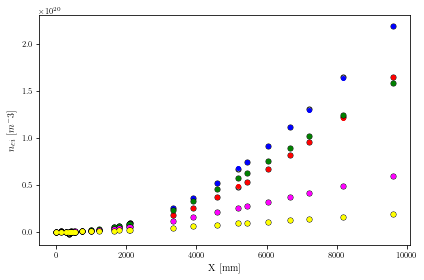

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


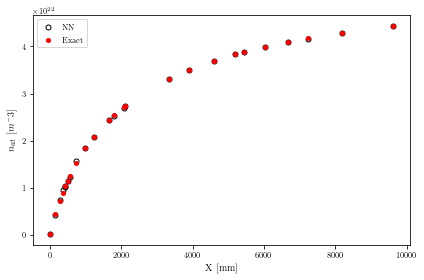

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


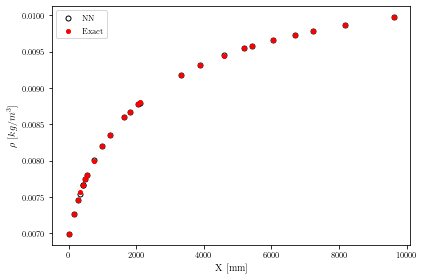

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


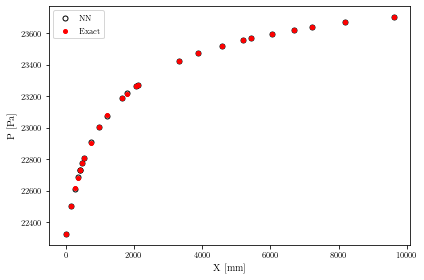

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


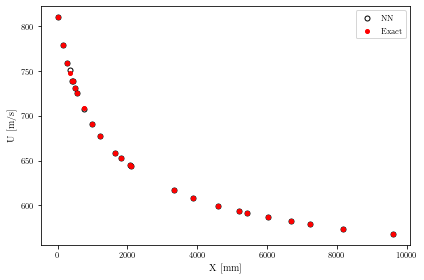

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


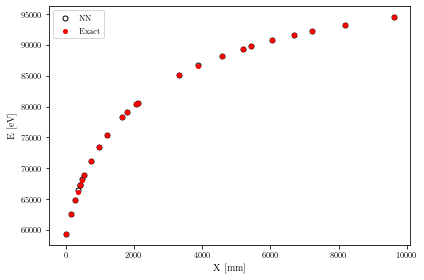

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


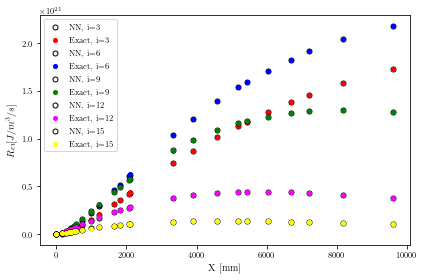

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


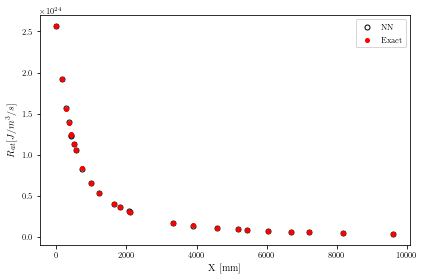

In [3]:
%matplotlib inline

# Plot Nci
plt.plot(x_test_sb, n3_pred_sb, 'o', color='black', label='NN, i=3', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, n3_test_sb, 'o', color='red',   label='Exact, i=3', markersize=4)
plt.plot(x_test_sb, n6_pred_sb, 'o', color='black', label='NN, i=6', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, n6_test_sb, 'o', color='blue',   label='Exact, i=6', markersize=4)
plt.plot(x_test_sb, n9_pred_sb, 'o', color='black', label='NN, i=9', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, n9_test_sb, 'o', color='green',   label='Exact, i=9', markersize=4)
plt.plot(x_test_sb, n12_pred_sb, 'o', color='black', label='NN, i=12', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, n12_test_sb, 'o', color='magenta',   label='Exact, i=12', markersize=4)
plt.plot(x_test_sb, n15_pred_sb, 'o', color='black', label='NN, i=15', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, n15_test_sb, 'o', color='yellow',   label='Exact, i=15', markersize=4)
#plt.title('Comparison of NN and Exact solution for Molecular Number Density')
plt.xlabel('X [mm]')
plt.ylabel('$n_{ci}$ $[m^-3]$')
#plt.legend()
plt.tight_layout()
savefig('./figures/Nci', crop = False)
plt.show()

# Plot Nat
plt.plot(x_test_sb, nat_pred_sb, 'o', color='black', label='NN', linewidth=2, markersize=5, fillstyle='none')
plt.plot(x_test_sb, nat_test_sb, 'o', color='red',   label='Exact', markersize=4)
#plt.title('Comparison of NN and Exact solution for Atomic Number Density')
plt.xlabel('X [mm]')
plt.ylabel('$n_{at}$ $[m^-3]$')
plt.legend()
plt.tight_layout()
savefig('./figures/Nat', crop = False)
plt.show()

# Plot RHO
plt.plot(x_test_sb, rho_pred_sb, 'o', color='black', label='NN', linewidth=2, markersize=5, fillstyle='none')
plt.plot(x_test_sb, rho_test_sb, 'o', color='red',   label='Exact', markersize=4)
#plt.title('Comparison of NN and Exact solution for Density')
plt.xlabel('X [mm]')
plt.ylabel(r'$\rho$ $[kg/m^3]$')
plt.legend()
plt.tight_layout()
savefig('./figures/RHO', crop = False)
plt.show()

# Plot P
plt.plot(x_test_sb, p_pred_sb, 'o', color='black', label='NN', linewidth=2, markersize=5, fillstyle='none')
plt.plot(x_test_sb, p_test_sb, 'o', color='red',   label='Exact', markersize=4)
#plt.title('Comparison of NN and Exact solution for Pressure')
plt.xlabel('X [mm]')
plt.ylabel('P [Pa]')
plt.legend()
plt.tight_layout()
savefig('./figures/P', crop = False)
plt.show()

# Plot U
plt.plot(x_test_sb, u_pred_sb, 'o', color='black', label='NN', linewidth=2, markersize=5, fillstyle='none')
plt.plot(x_test_sb, u_test_sb, 'o', color='red',   label='Exact', markersize=4)
#plt.title('Comparison of NN and Exact solution for Velocity')
plt.xlabel('X [mm]')
plt.ylabel('U [m/s]')
plt.legend()
plt.tight_layout()
savefig('./figures/U', crop = False)
plt.show()

# Plot E
plt.plot(x_test_sb, E_pred_sb, 'o', color='black', label='NN', linewidth=2, markersize=5, fillstyle='none')
plt.plot(x_test_sb, E_test_sb, 'o', color='red',   label='Exact', markersize=4)
#plt.title('Comparison of NN and Exact solution for Energy')
plt.xlabel('X [mm]')
plt.ylabel('E [eV]')
plt.legend()
plt.tight_layout()
savefig('./figures/E', crop = False)
plt.show()

# Plot Rci
plt.plot(x_test_sb, R3_pred_sb,  'o', color='black',   label='NN, i=3',  linewidth=4,  markersize=5, fillstyle='none')
plt.plot(x_test_sb, R3_test_sb,  'o', color='red',     label='Exact, i=3',            markersize=4)
plt.plot(x_test_sb, R6_pred_sb,  'o', color='black',   label='NN, i=6',  linewidth=4,  markersize=5, fillstyle='none')
plt.plot(x_test_sb, R6_test_sb,  'o', color='blue',    label='Exact, i=6',            markersize=4)
plt.plot(x_test_sb, R9_pred_sb,  'o', color='black',   label='NN, i=9',  linewidth=4,  markersize=5, fillstyle='none')
plt.plot(x_test_sb, R9_test_sb,  'o', color='green',   label='Exact, i=9',            markersize=4)
plt.plot(x_test_sb, R12_pred_sb, 'o', color='black',   label='NN, i=12', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, R12_test_sb, 'o', color='magenta', label='Exact, i=12',           markersize=4)
plt.plot(x_test_sb, R15_pred_sb, 'o', color='black',   label='NN, i=15', linewidth=4, markersize=5, fillstyle='none')
plt.plot(x_test_sb, R15_test_sb, 'o', color='yellow',  label='Exact, i=15',           markersize=4)
#plt.title('Comparison of NN and Exact solution for $R_{ci}$')
plt.xlabel('X [mm]')
plt.ylabel(r'$R_{ci} [J/m^3/s]$')
plt.legend()
plt.tight_layout()
savefig('./figures/Rci', crop = False)
plt.show()

# Plot Rat
plt.plot(x_test_sb, Rat_pred_sb, 'o', color='black', label='NN', linewidth=2, markersize=5, fillstyle='none')
plt.plot(x_test_sb, Rat_test_sb, 'o', color='red',   label='Exact',           markersize=4 )
#plt.title('Comparison of NN and Exact solution for $R_{at}$')
plt.xlabel('X [mm]')
plt.ylabel(r'$R_{at} [J/m^3/s]$')
plt.legend()
plt.tight_layout()
savefig('./figures/Rat', crop='false')
plt.show()